In [1]:
library(dplyr)
library(ggplot2)
library(lattice)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Import "collisions_weather_data.csv" file

In [2]:
collision_data <- read.csv("https://raw.githubusercontent.com/uhi22018990/DataAnalytics/main/collisions_weather_data.csv", stringsAsFactors = TRUE)

Just as before, in the main document, let's have a quick look at our data:

In [3]:
head(collision_data)

,dim_date_year,dim_date_month,dim_date_day_number,collision_date,num_collisions,weather_date,temperature,dew_point,sea_level_pressure,visibility,wind_speed,max_sustained_wind_speed,max_wind_gust,max_temperature,min_temperature,total_precipitation,snow_depth,fog_occurred
,<int>,<int>,<int>,<fct>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,2012,7,7,2012-07-01,538,2012-07-01,83.6,63.0,1008.9,9.7,4.1,9.9,18.1,93.0,66.0,0.00,999.9,0
2,2012,7,1,2012-07-02,564,2012-07-02,80.3,54.1,1011.6,10.0,3.8,15.0,999.9,88.0,66.9,0.00,999.9,0
3,2012,7,2,2012-07-03,664,2012-07-03,79.8,56.7,1012.8,10.0,2.9,12.0,999.9,88.0,63.0,0.00,999.9,0
4,2012,7,3,2012-07-04,432,2012-07-04,81.8,65.6,1009.1,9.2,3.6,11.1,999.9,91.0,68.0,0.06,999.9,0
5,2012,7,4,2012-07-05,591,2012-07-05,86.7,64.3,1007.4,9.4,3.8,15.0,999.9,93.9,70.0,99.99,999.9,0
6,2012,7,5,2012-07-06,638,2012-07-06,81.9,62.3,1011.7,10.0,3.1,9.9,999.9,91.0,66.9,0.00,999.9,0


In [4]:
tail(collision_data)

,dim_date_year,dim_date_month,dim_date_day_number,collision_date,num_collisions,weather_date,temperature,dew_point,sea_level_pressure,visibility,wind_speed,max_sustained_wind_speed,max_wind_gust,max_temperature,min_temperature,total_precipitation,snow_depth,fog_occurred
,<int>,<int>,<int>,<fct>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
3764,2022,10,4,2022-10-20,275,2022-10-20,50.5,32.2,1014.3,10.0,5.0,8.9,15.9,57.0,42.1,0.00,999.9,0
3765,2022,10,5,2022-10-21,285,2022-10-21,53.8,34.3,1018.9,10.0,2.3,5.1,999.9,62.1,44.1,0.00,999.9,0
3766,2022,10,6,2022-10-22,278,2022-10-22,57.1,40.0,1023.7,10.0,2.4,6.0,999.9,66.0,46.0,0.00,999.9,0
3767,2022,10,7,2022-10-23,202,2022-10-23,57.5,46.7,1025.1,10.0,4.8,11.1,18.1,66.0,48.9,0.00,999.9,1
3768,2022,10,1,2022-10-24,216,2022-10-24,57.2,52.8,1021.8,6.0,6.9,9.9,20.0,61.0,54.0,0.16,999.9,1
3769,2022,10,2,2022-10-25,194,2022-10-25,64.0,62.2,1018.5,2.9,3.3,8.9,999.9,70.0,55.0,0.38,999.9,1


The data seems to be the same we have on big query


In [5]:
summary(collision_data)

 dim_date_year  dim_date_month   dim_date_day_number    collision_date
 Min.   :2012   Min.   : 1.000   Min.   :1.000       2012-07-01:   1  
 1st Qu.:2015   1st Qu.: 4.000   1st Qu.:2.000       2012-07-02:   1  
 Median :2017   Median : 7.000   Median :4.000       2012-07-03:   1  
 Mean   :2017   Mean   : 6.582   Mean   :3.999       2012-07-04:   1  
 3rd Qu.:2020   3rd Qu.:10.000   3rd Qu.:6.000       2012-07-05:   1  
 Max.   :2022   Max.   :12.000   Max.   :7.000       2012-07-06:   1  
                                                     (Other)   :3763  
 num_collisions       weather_date   temperature     dew_point     
 Min.   :  94.0   2012-07-01:   1   Min.   : 6.9   Min.   :-16.10  
 1st Qu.: 365.0   2012-07-02:   1   1st Qu.:42.6   1st Qu.: 27.30  
 Median : 549.0   2012-07-03:   1   Median :57.6   Median : 43.80  
 Mean   : 514.7   2012-07-04:   1   Mean   :56.4   Mean   : 42.04  
 3rd Qu.: 635.0   2012-07-05:   1   3rd Qu.:72.0   3rd Qu.: 58.30  
 Max.   :1161.0   2012-0

ah we have outliers here: 999.90 is indication of missing value

In [8]:
options(repr.plot.width=20, repr.plot.height=10)

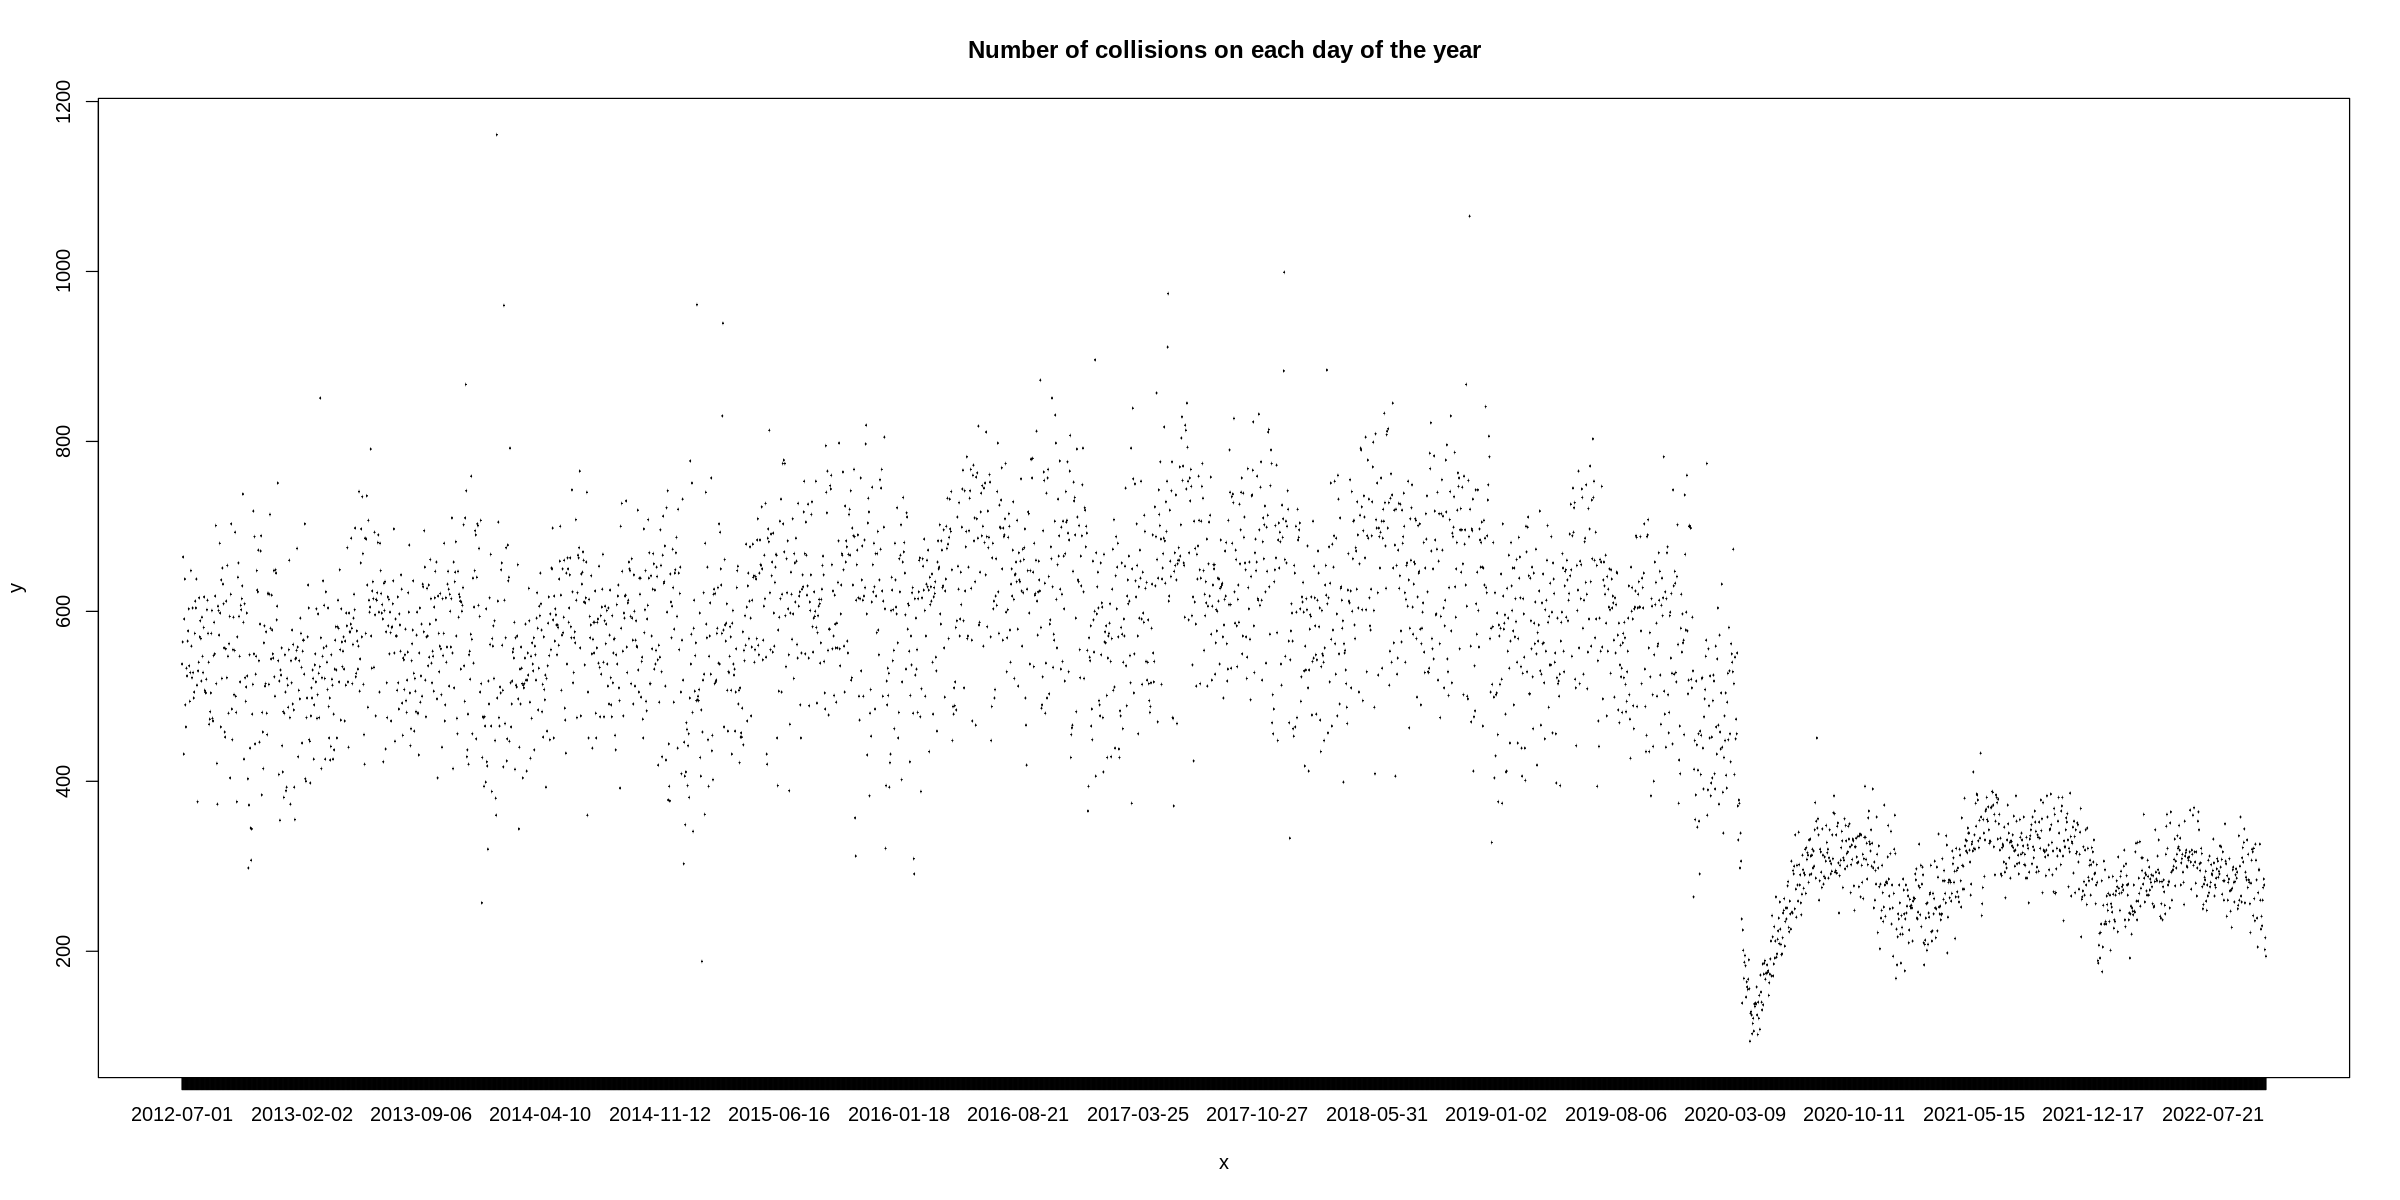

In [9]:
plot(collision_data$collision_date, collision_data$num_collisions, main="Number of collisions on each day of the year")

clearly 2020 drop is due the Covid 19 lock down.

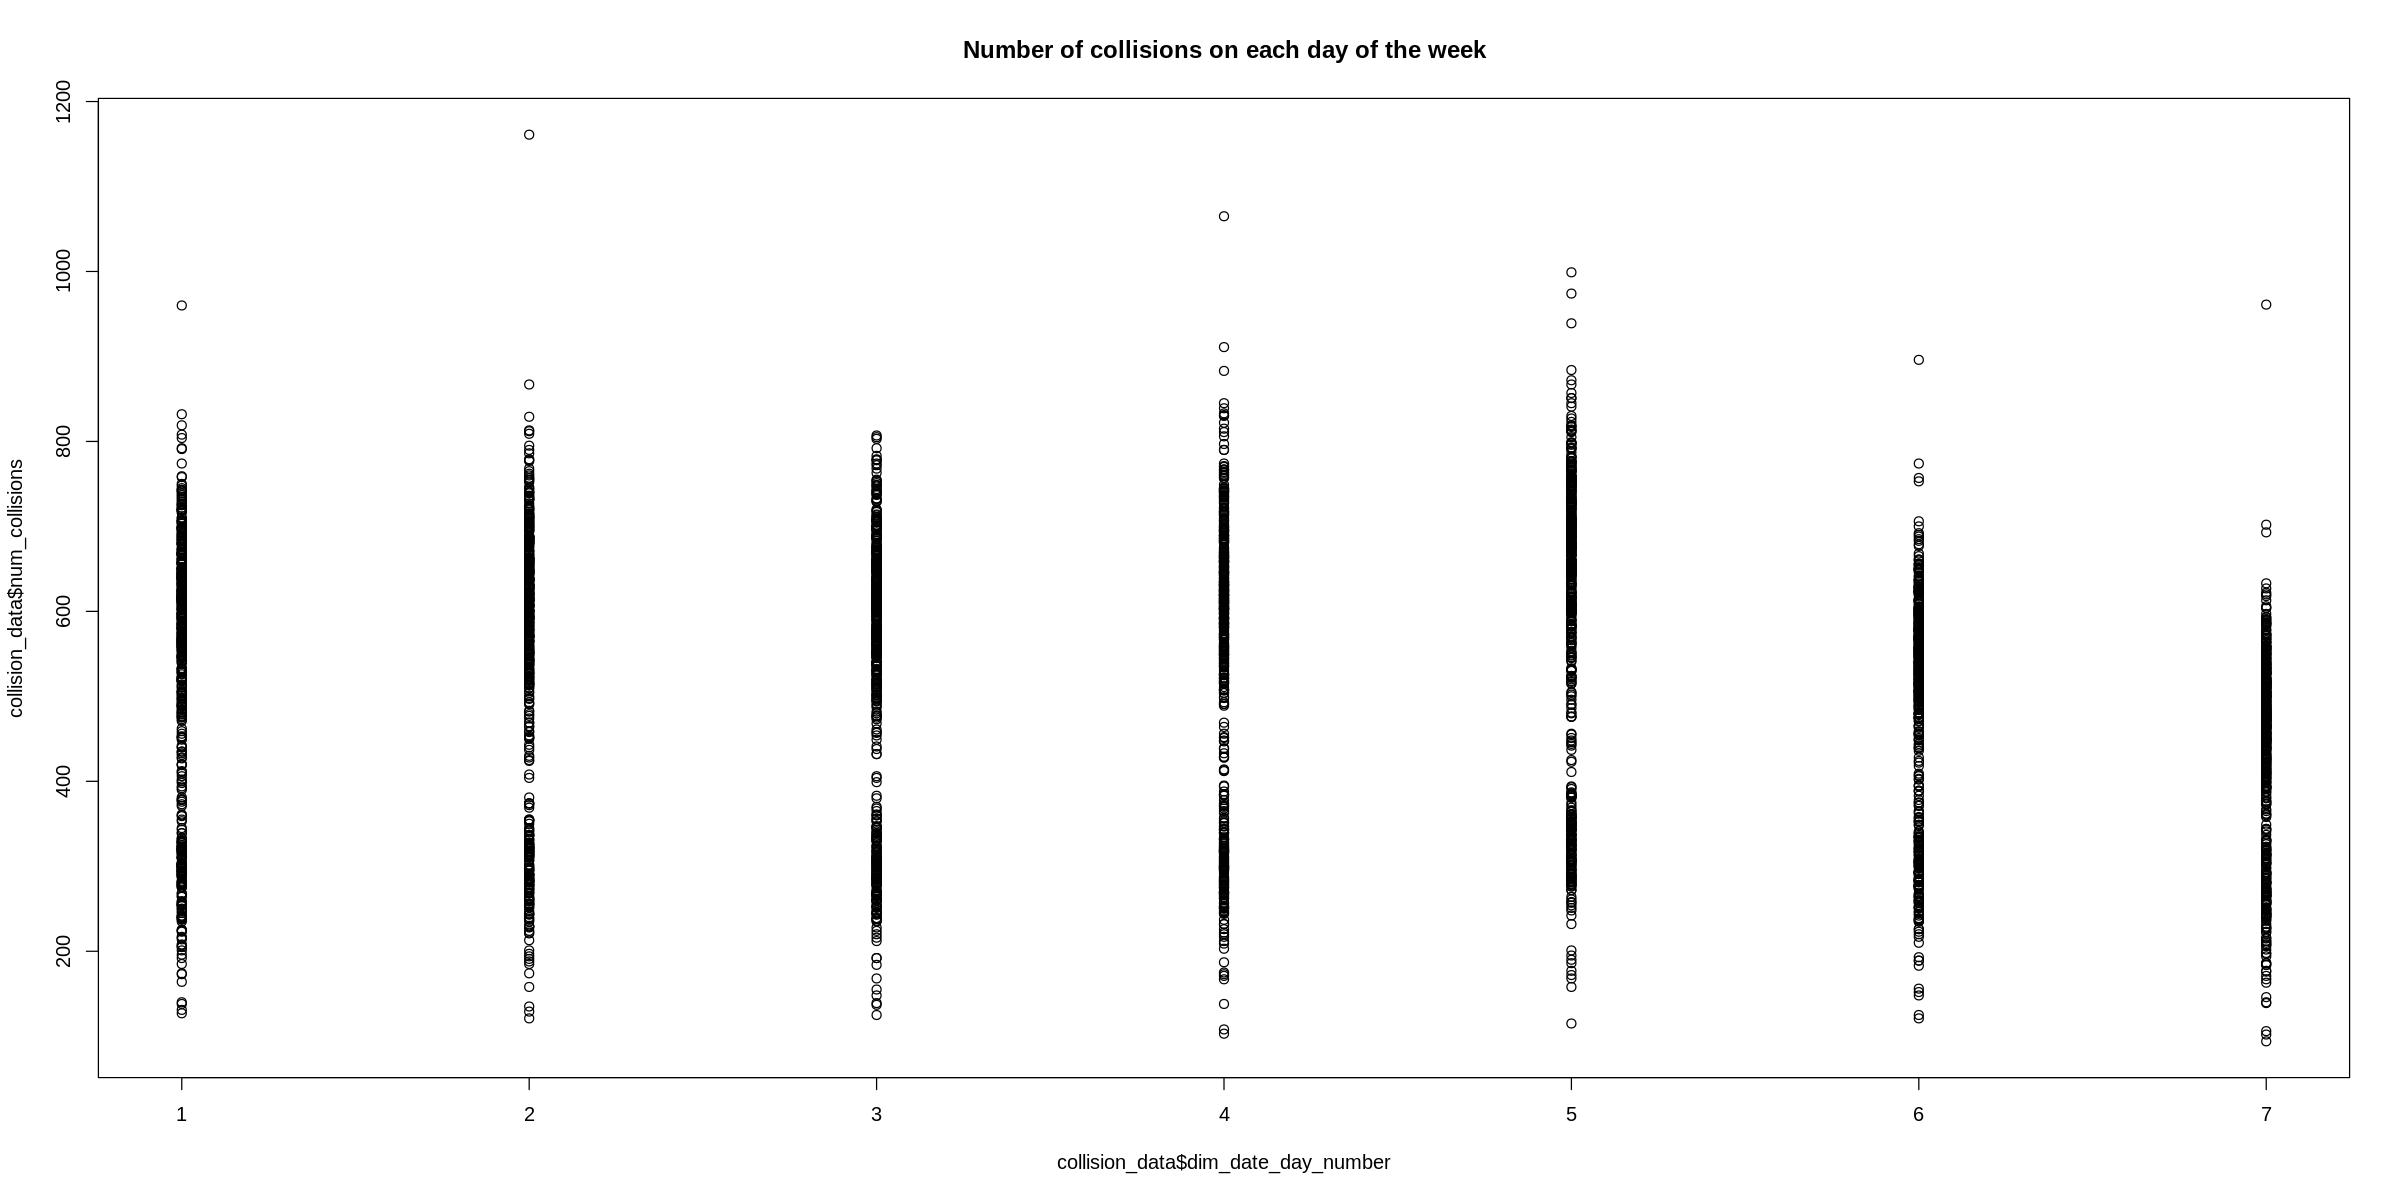

In [10]:
plot(collision_data$dim_date_day_number, collision_data$num_collisions, main="Number of collisions on each day of the week")

Uhmm, there is no visible linear relation here.

## temperature

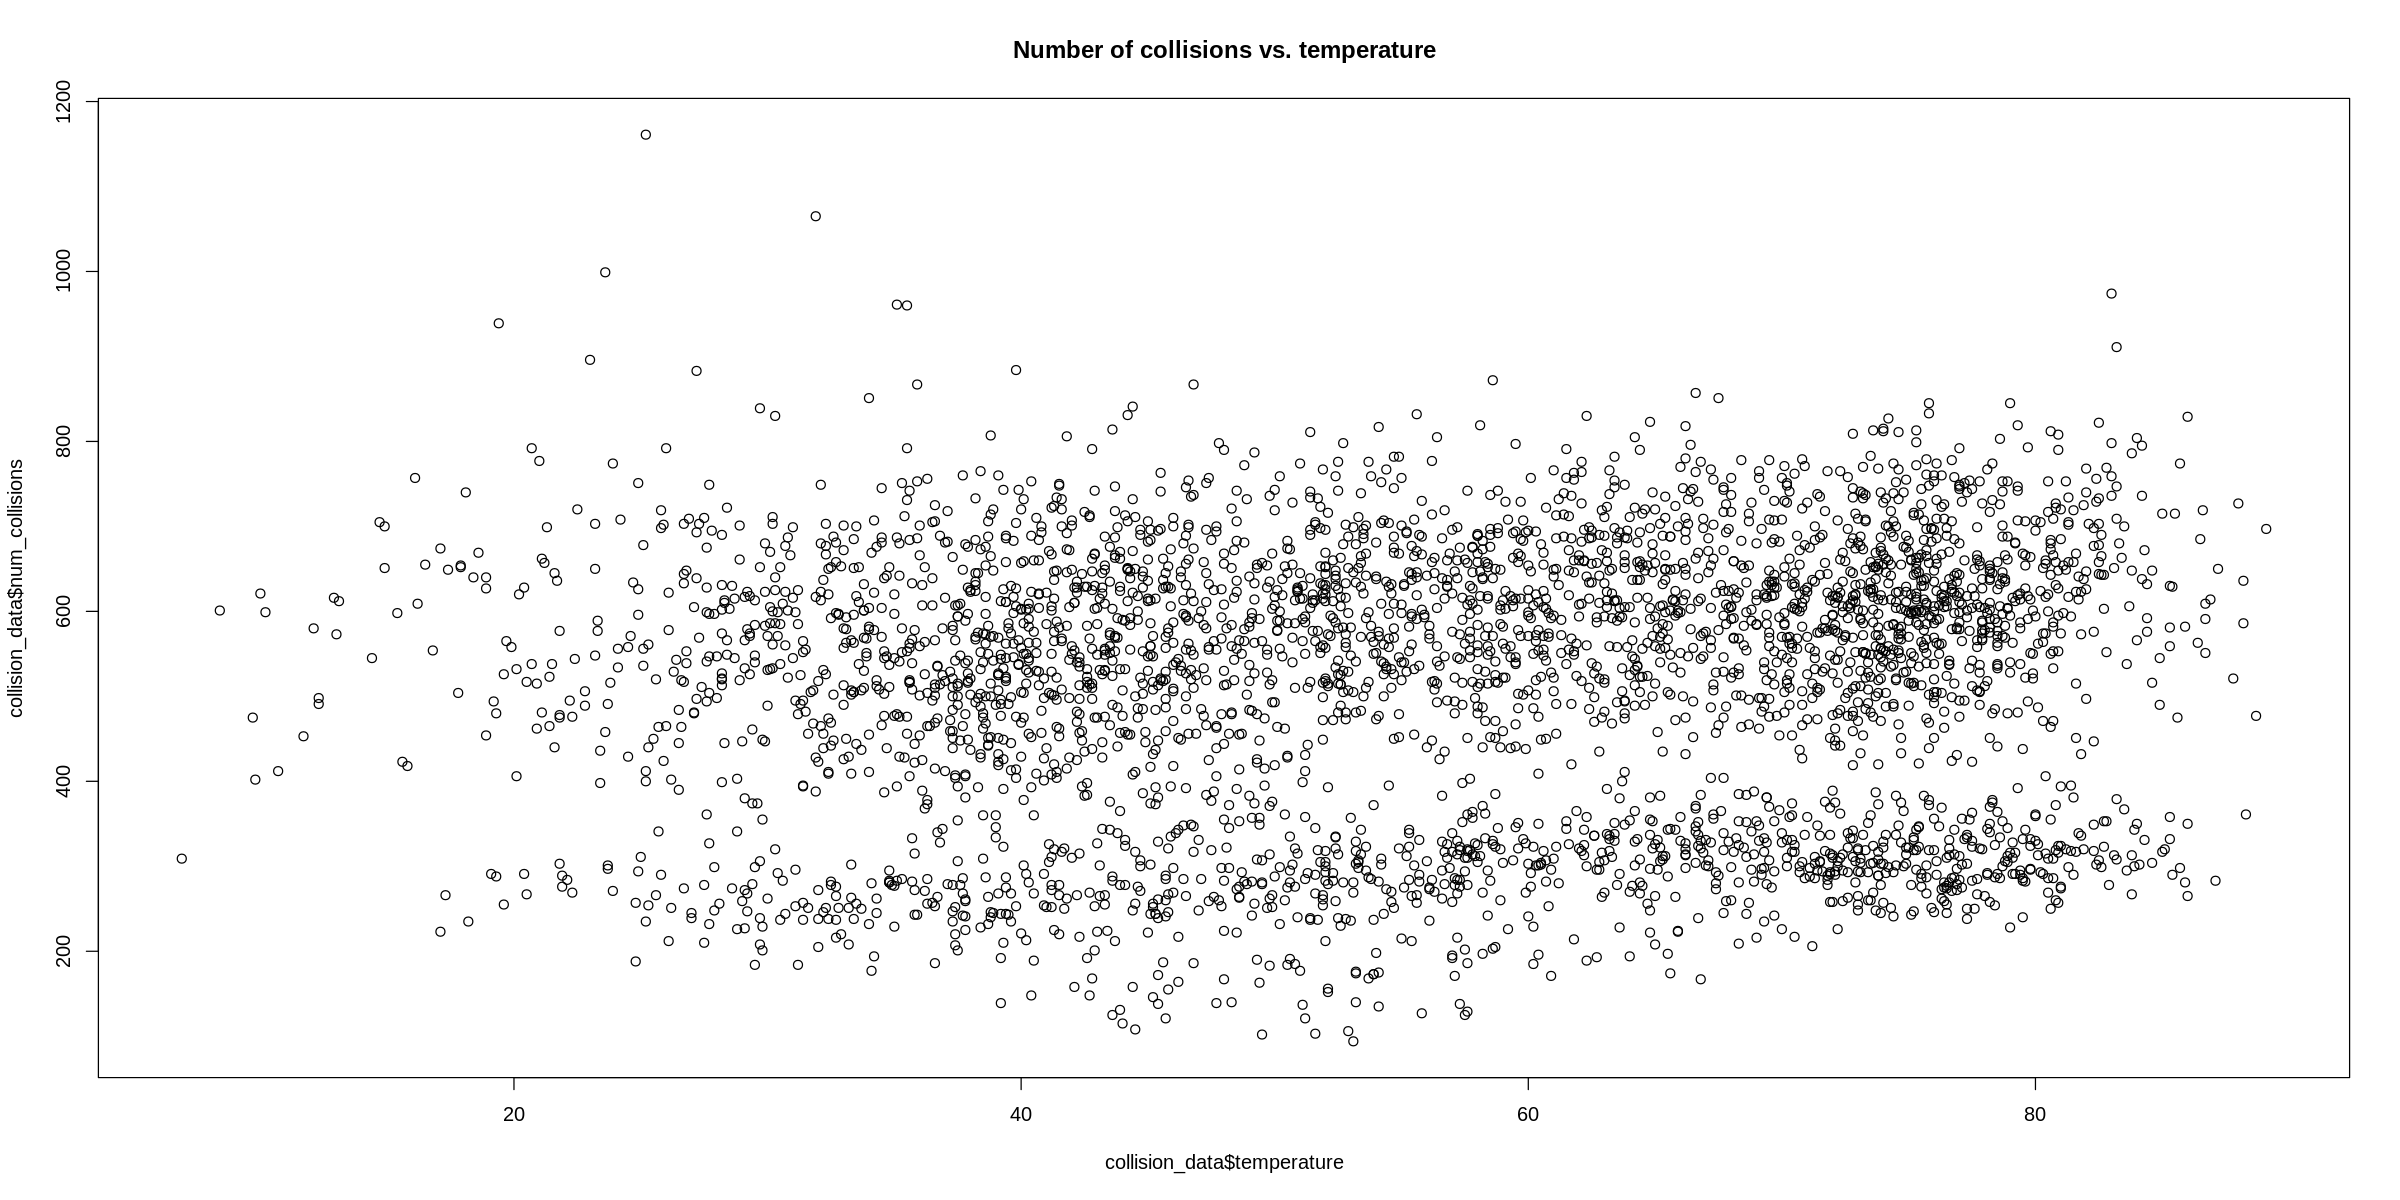

In [16]:
plot(collision_data$temperature, collision_data$num_collisions, main="Number of collisions vs. temperature")

looks like there is not correlation and seems to be confirmed by the coefficient below

In [17]:
cor(collision_data$temperature, collision_data$num_collisions)

[1] 0.06948661

## snow data

now let's create a dataframe removing 999 from the recorded snow data

In [18]:
snow_data <- collision_data[ which(collision_data$snow_depth < 999),]
head(snow_data)
summary(snow_data$snow_depth)

,dim_date_year,dim_date_month,dim_date_day_number,collision_date,num_collisions,weather_date,temperature,dew_point,sea_level_pressure,visibility,wind_speed,max_sustained_wind_speed,max_wind_gust,max_temperature,min_temperature,total_precipitation,snow_depth,fog_occurred
,<int>,<int>,<int>,<fct>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
132,2012,11,5,2012-11-09,688,2012-11-09,43.3,25.8,1016.1,9.8,9.6,30.9,43.9,53.1,36.0,0.17,3.9,0
211,2013,1,7,2013-01-27,429,2013-01-27,24.5,7.5,1030.3,10.0,5.6,9.9,15.9,34.0,19.0,0.00,2.0,0
212,2013,1,1,2013-01-28,507,2013-01-28,31.8,19.0,1029.1,6.9,3.5,8.9,18.1,34.0,28.9,0.00,1.2,0
213,2013,1,2,2013-01-29,542,2013-01-29,40.3,35.3,1018.2,5.3,4.3,8.0,14.0,48.0,34.0,0.22,1.2,0
226,2013,2,1,2013-02-11,475,2013-02-11,38.5,32.4,1019.6,5.6,3.2,7.0,999.9,45.0,32.0,0.09,9.8,1
227,2013,2,2,2013-02-12,498,2013-02-12,41.9,28.8,1009.8,8.8,7.2,14.0,22.0,45.0,39.9,0.40,9.1,0


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.200   2.000   5.500   6.081   8.200  22.000 

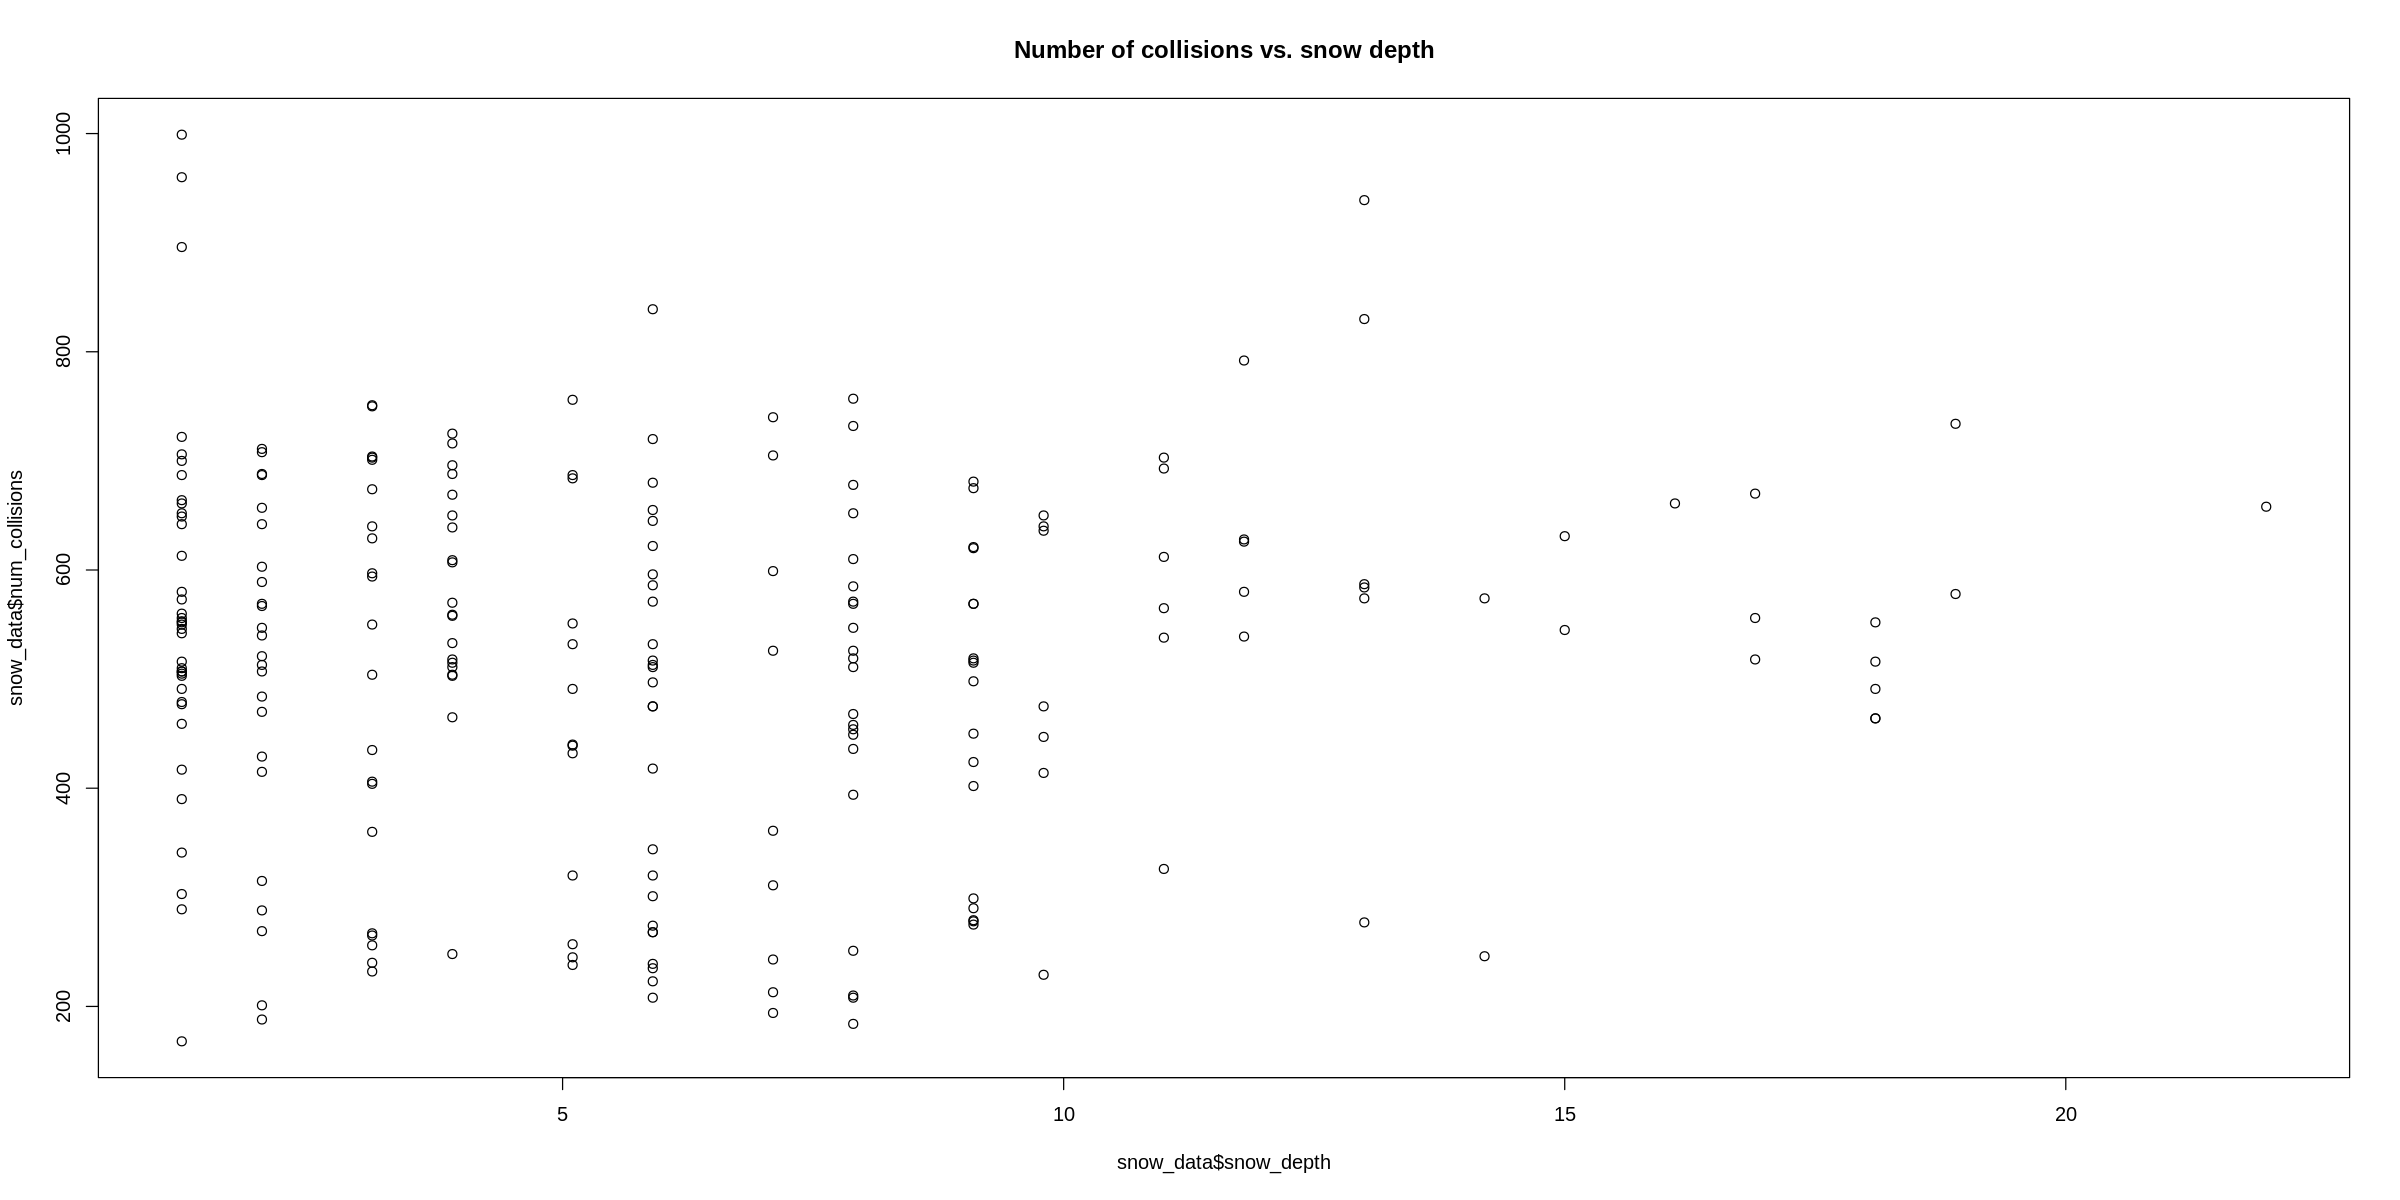

In [19]:
plot(snow_data$snow_depth, snow_data$num_collisions, main="Number of collisions vs. snow depth")

In [20]:
cor(snow_data$snow_depth, snow_data$num_collisions)

[1] 0.02422826

we do not have snow all year, so let's reduce b


https://weatherspark.com/y/23912/Average-Weather-in-New-York-City-New-York-United-States-Year-Round

So let's reduce the perios between december and march

In [21]:
snow_data_winter <- snow_data[ which(snow_data$dim_date_month > 11 | between(snow_data$dim_date_month, 1, 3)),]
head(snow_data_winter)
tail(snow_data_winter)

,dim_date_year,dim_date_month,dim_date_day_number,collision_date,num_collisions,weather_date,temperature,dew_point,sea_level_pressure,visibility,wind_speed,max_sustained_wind_speed,max_wind_gust,max_temperature,min_temperature,total_precipitation,snow_depth,fog_occurred
,<int>,<int>,<int>,<fct>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
211,2013,1,7,2013-01-27,429,2013-01-27,24.5,7.5,1030.3,10.0,5.6,9.9,15.9,34.0,19.0,0.00,2.0,0
212,2013,1,1,2013-01-28,507,2013-01-28,31.8,19.0,1029.1,6.9,3.5,8.9,18.1,34.0,28.9,0.00,1.2,0
213,2013,1,2,2013-01-29,542,2013-01-29,40.3,35.3,1018.2,5.3,4.3,8.0,14.0,48.0,34.0,0.22,1.2,0
226,2013,2,1,2013-02-11,475,2013-02-11,38.5,32.4,1019.6,5.6,3.2,7.0,999.9,45.0,32.0,0.09,9.8,1
227,2013,2,2,2013-02-12,498,2013-02-12,41.9,28.8,1009.8,8.8,7.2,14.0,22.0,45.0,39.9,0.40,9.1,0
228,2013,2,3,2013-02-13,570,2013-02-13,38.2,22.5,1011.2,9.9,3.0,7.0,15.0,44.1,33.1,0.00,3.9,0


,dim_date_year,dim_date_month,dim_date_day_number,collision_date,num_collisions,weather_date,temperature,dew_point,sea_level_pressure,visibility,wind_speed,max_sustained_wind_speed,max_wind_gust,max_temperature,min_temperature,total_precipitation,snow_depth,fog_occurred
,<int>,<int>,<int>,<fct>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
3503,2022,2,2,2022-02-01,274,2022-02-01,28.6,14.0,1032.9,10.0,4.4,8.0,999.9,36.0,21.0,0.00,5.9,0
3504,2022,2,3,2022-02-02,268,2022-02-02,37.7,30.6,1031.3,8.8,3.5,6.0,999.9,46.9,23.0,0.00,5.9,0
3505,2022,2,4,2022-02-03,248,2022-02-03,44.4,42.1,1024.8,4.5,3.0,8.9,999.9,48.0,32.0,0.01,3.9,1
3506,2022,2,5,2022-02-04,288,2022-02-04,43.6,40.8,1013.6,5.5,5.4,9.9,22.0,57.0,28.9,0.60,2.0,1
3516,2022,2,1,2022-02-14,303,2022-02-14,21.8,3.5,1019.5,10.0,7.9,12.0,22.0,42.1,16.0,0.09,1.2,0
3517,2022,2,2,2022-02-15,289,2022-02-15,21.9,0.3,1034.1,10.0,4.5,8.0,999.9,30.0,16.0,0.00,1.2,0


no relation also here



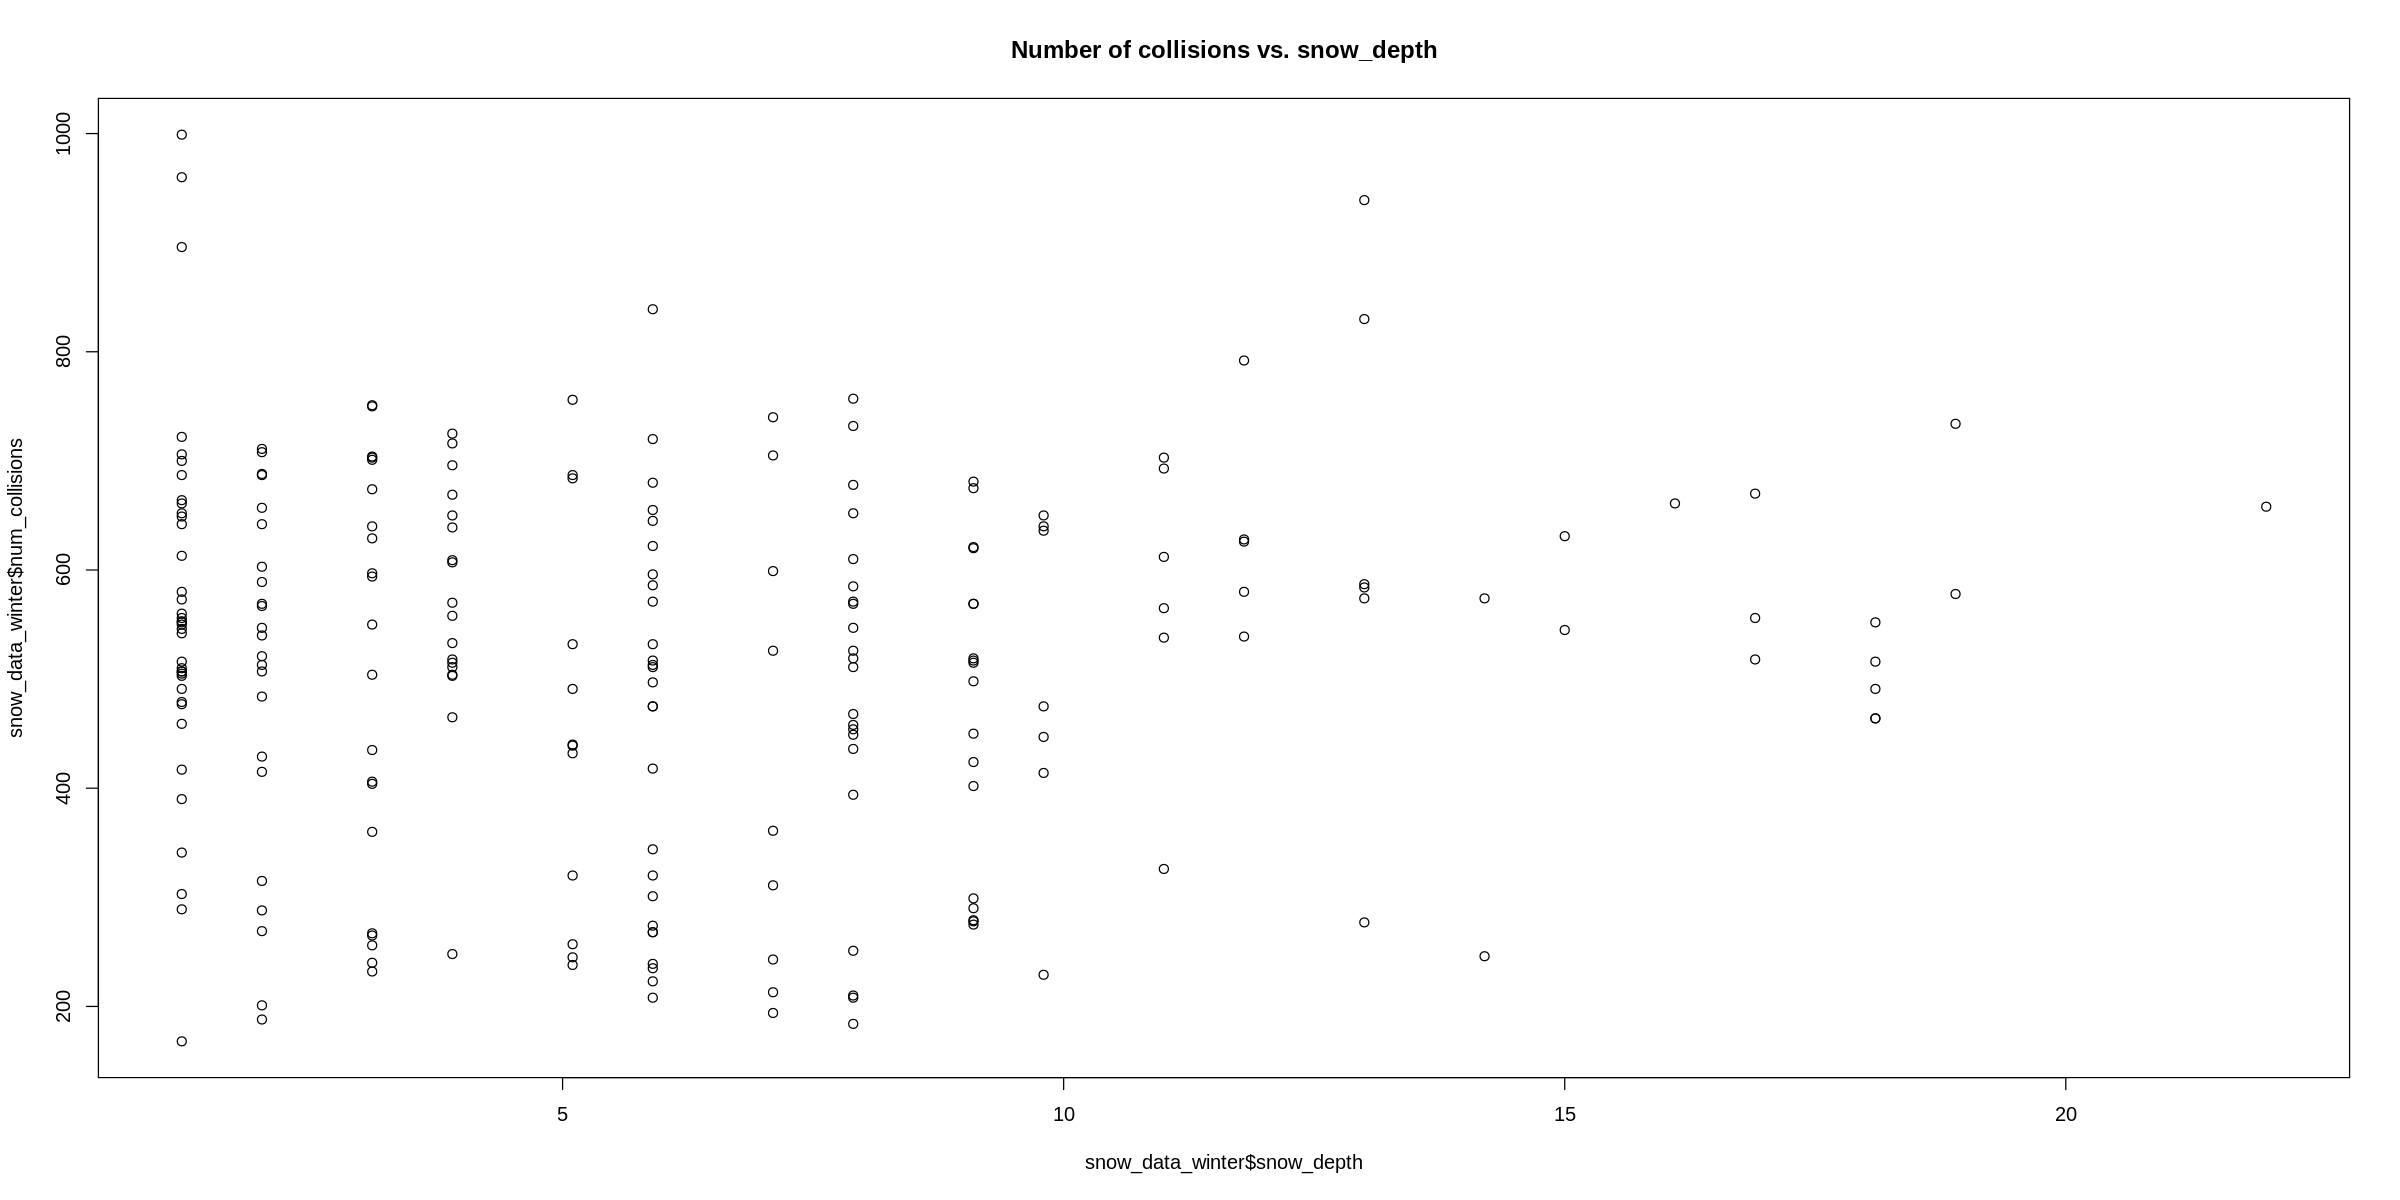

In [22]:
plot(snow_data_winter$snow_depth, snow_data_winter$num_collisions, main="Number of collisions vs. snow_depth")

In [23]:
cor(snow_data_winter$snow_depth,  snow_data_winter$num_collisions)

[1] 0.02618061

## Visibility



In [30]:
visibility <- collision_data[ which(collision_data$visibility < 999),]
head(visibility)
summary(visibility$visibility)

,dim_date_year,dim_date_month,dim_date_day_number,collision_date,num_collisions,weather_date,temperature,dew_point,sea_level_pressure,visibility,wind_speed,max_sustained_wind_speed,max_wind_gust,max_temperature,min_temperature,total_precipitation,snow_depth,fog_occurred
,<int>,<int>,<int>,<fct>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,2012,7,7,2012-07-01,538,2012-07-01,83.6,63.0,1008.9,9.7,4.1,9.9,18.1,93.0,66.0,0.00,999.9,0
2,2012,7,1,2012-07-02,564,2012-07-02,80.3,54.1,1011.6,10.0,3.8,15.0,999.9,88.0,66.9,0.00,999.9,0
3,2012,7,2,2012-07-03,664,2012-07-03,79.8,56.7,1012.8,10.0,2.9,12.0,999.9,88.0,63.0,0.00,999.9,0
4,2012,7,3,2012-07-04,432,2012-07-04,81.8,65.6,1009.1,9.2,3.6,11.1,999.9,91.0,68.0,0.06,999.9,0
5,2012,7,4,2012-07-05,591,2012-07-05,86.7,64.3,1007.4,9.4,3.8,15.0,999.9,93.9,70.0,99.99,999.9,0
6,2012,7,5,2012-07-06,638,2012-07-06,81.9,62.3,1011.7,10.0,3.1,9.9,999.9,91.0,66.9,0.00,999.9,0


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.700   8.500   9.800   9.011  10.000  10.000 

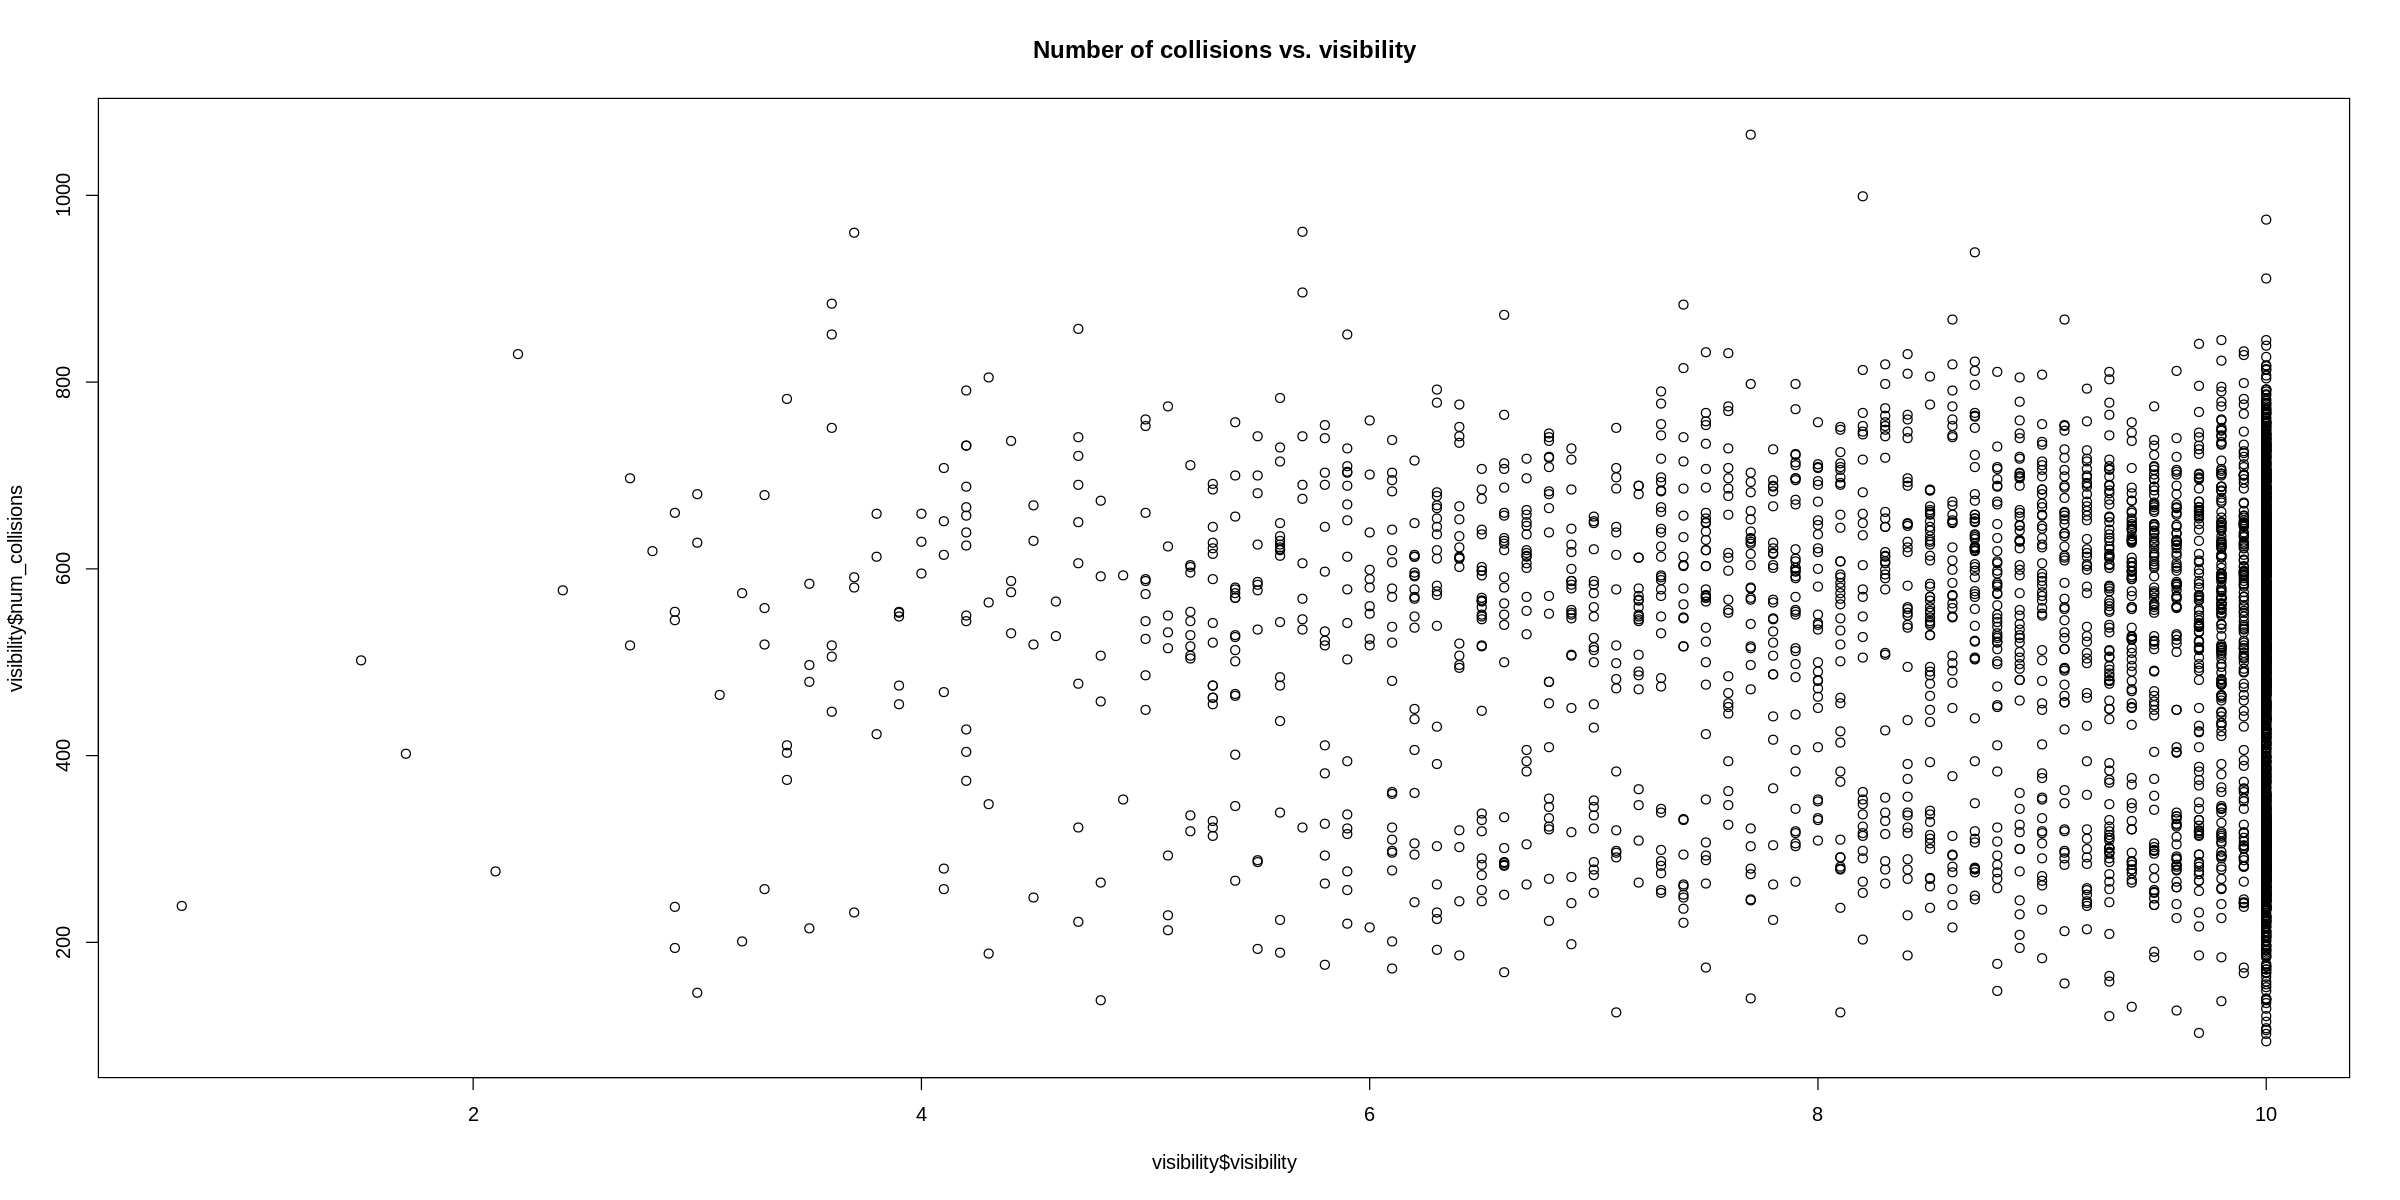

In [31]:
plot(visibility$visibility, visibility$num_collisions, main="Number of collisions vs. visibility")

In [32]:
cor(visibility$visibility,  visibility$num_collisions)

[1] -0.07405744

Let's try to reduce the datase and see if there is any correlation is a smaller dataset


In [33]:
visibility_short <- visibility[ which(visibility$visibility < 3),]
summary(visibility_short)

 dim_date_year  dim_date_month   dim_date_day_number    collision_date
 Min.   :2012   Min.   : 1.000   Min.   :1.000       2012-10-03:1     
 1st Qu.:2014   1st Qu.: 2.000   1st Qu.:2.000       2012-10-04:1     
 Median :2018   Median : 4.500   Median :3.500       2012-12-10:1     
 Mean   :2017   Mean   : 6.071   Mean   :3.429       2014-02-21:1     
 3rd Qu.:2020   3rd Qu.:10.000   3rd Qu.:4.750       2015-03-05:1     
 Max.   :2022   Max.   :12.000   Max.   :6.000       2016-01-23:1     
                                                     (Other)   :8     
 num_collisions      weather_date  temperature      dew_point    
 Min.   :194.0   2012-10-03:1     Min.   :21.90   Min.   :16.10  
 1st Qu.:307.5   2012-10-04:1     1st Qu.:30.73   1st Qu.:27.52  
 Median :531.5   2012-12-10:1     Median :40.05   Median :38.15  
 Mean   :489.4   2014-02-21:1     Mean   :44.62   Mean   :41.86  
 3rd Qu.:608.5   2015-03-05:1     3rd Qu.:60.58   3rd Qu.:59.02  
 Max.   :830.0   2016-01-23:1     Ma

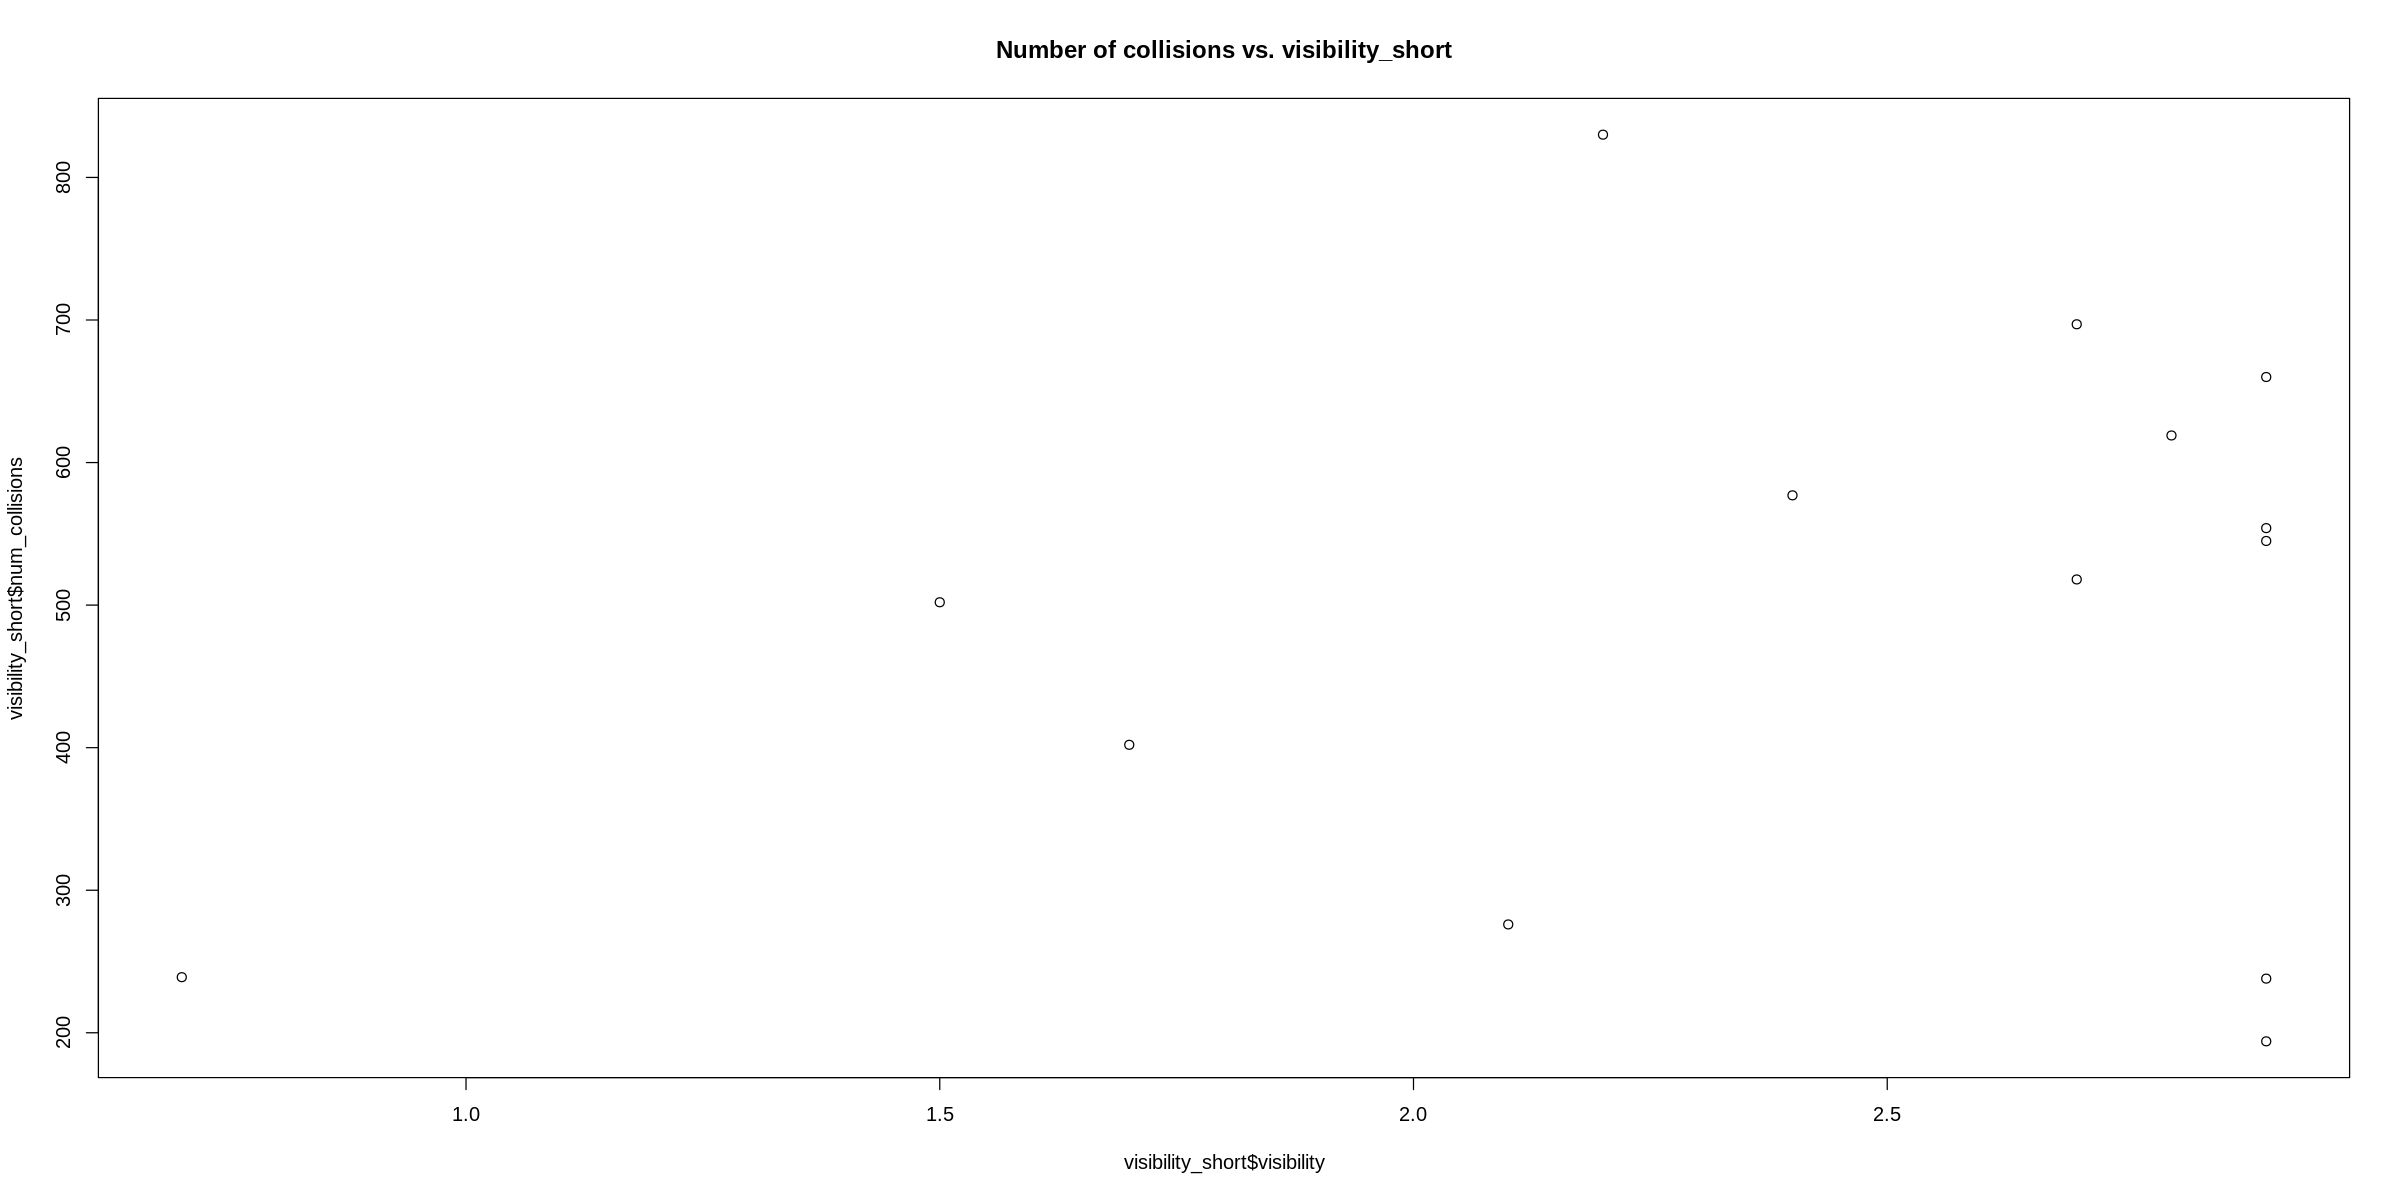

In [34]:
plot(visibility_short$visibility, visibility_short$num_collisions, main="Number of collisions vs. visibility_short")

In [35]:
cor(visibility_short$visibility, visibility_short$num_collisions)

[1] 0.2748189

Nope!, No correleation here

In [ ]:
visibility_short <- visibility[ which(visibility$visibility < 5),]

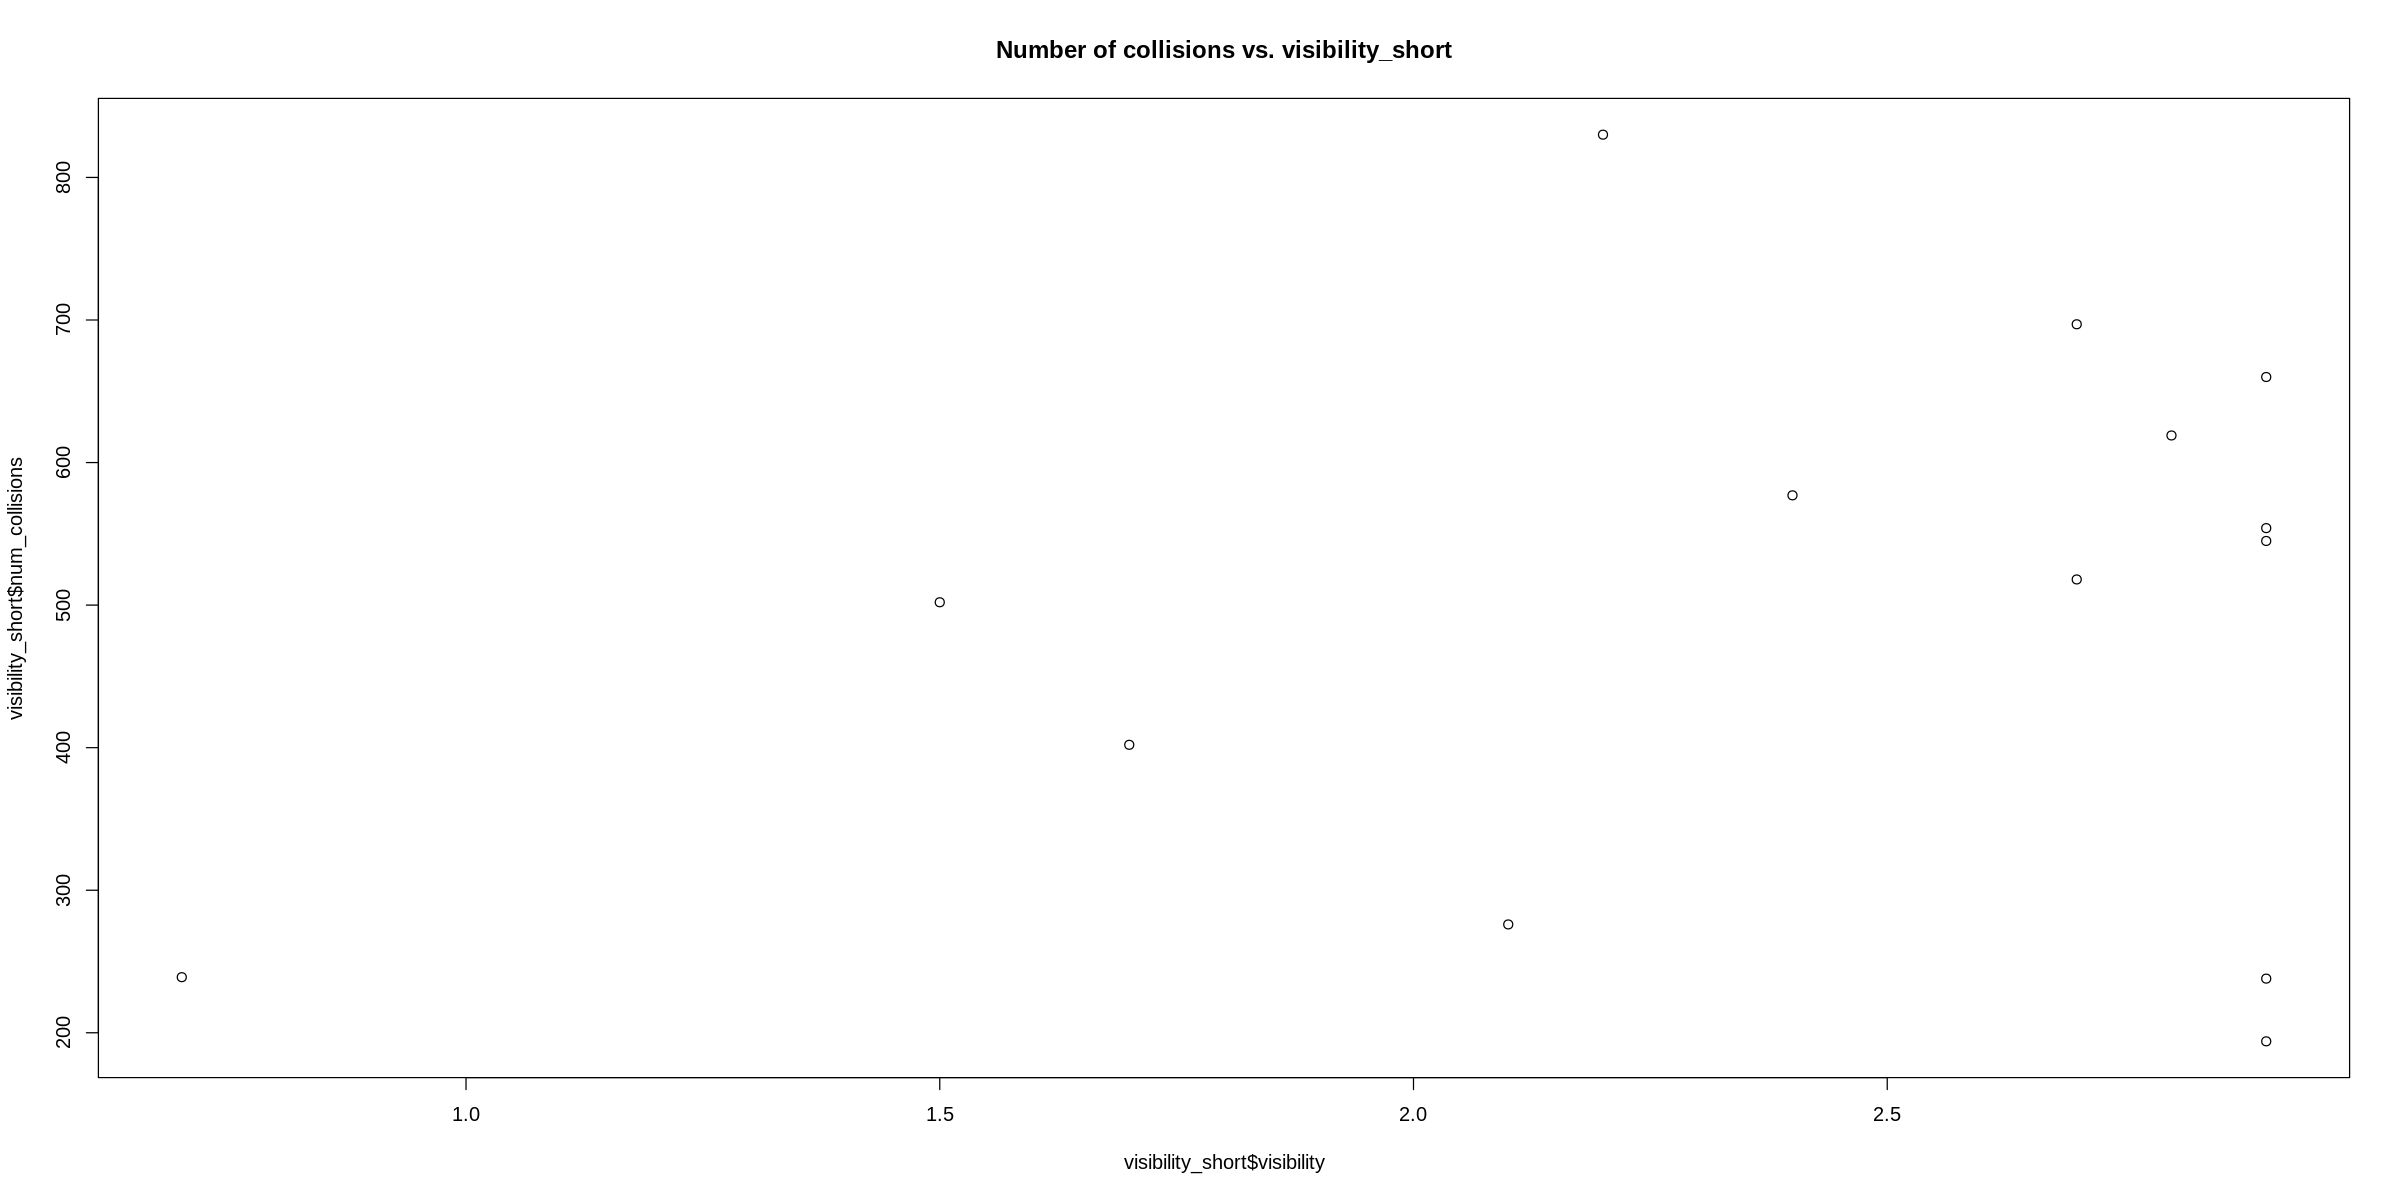

In [36]:
plot(visibility_short$visibility, visibility_short$num_collisions, main="Number of collisions vs. visibility_short")

In [37]:
cor(visibility_short$visibility, visibility_short$num_collisions)

[1] 0.2748189

## wind speed


In [39]:
wind_speed <- collision_data[ which(collision_data$wind_speed < 999),]
head(wind_speed)
summary(wind_speed$wind_speed)

,dim_date_year,dim_date_month,dim_date_day_number,collision_date,num_collisions,weather_date,temperature,dew_point,sea_level_pressure,visibility,wind_speed,max_sustained_wind_speed,max_wind_gust,max_temperature,min_temperature,total_precipitation,snow_depth,fog_occurred
,<int>,<int>,<int>,<fct>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,2012,7,7,2012-07-01,538,2012-07-01,83.6,63.0,1008.9,9.7,4.1,9.9,18.1,93.0,66.0,0.00,999.9,0
2,2012,7,1,2012-07-02,564,2012-07-02,80.3,54.1,1011.6,10.0,3.8,15.0,999.9,88.0,66.9,0.00,999.9,0
3,2012,7,2,2012-07-03,664,2012-07-03,79.8,56.7,1012.8,10.0,2.9,12.0,999.9,88.0,63.0,0.00,999.9,0
4,2012,7,3,2012-07-04,432,2012-07-04,81.8,65.6,1009.1,9.2,3.6,11.1,999.9,91.0,68.0,0.06,999.9,0
5,2012,7,4,2012-07-05,591,2012-07-05,86.7,64.3,1007.4,9.4,3.8,15.0,999.9,93.9,70.0,99.99,999.9,0
6,2012,7,5,2012-07-06,638,2012-07-06,81.9,62.3,1011.7,10.0,3.1,9.9,999.9,91.0,66.9,0.00,999.9,0


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   2.900   4.100   4.488   5.700  18.700 

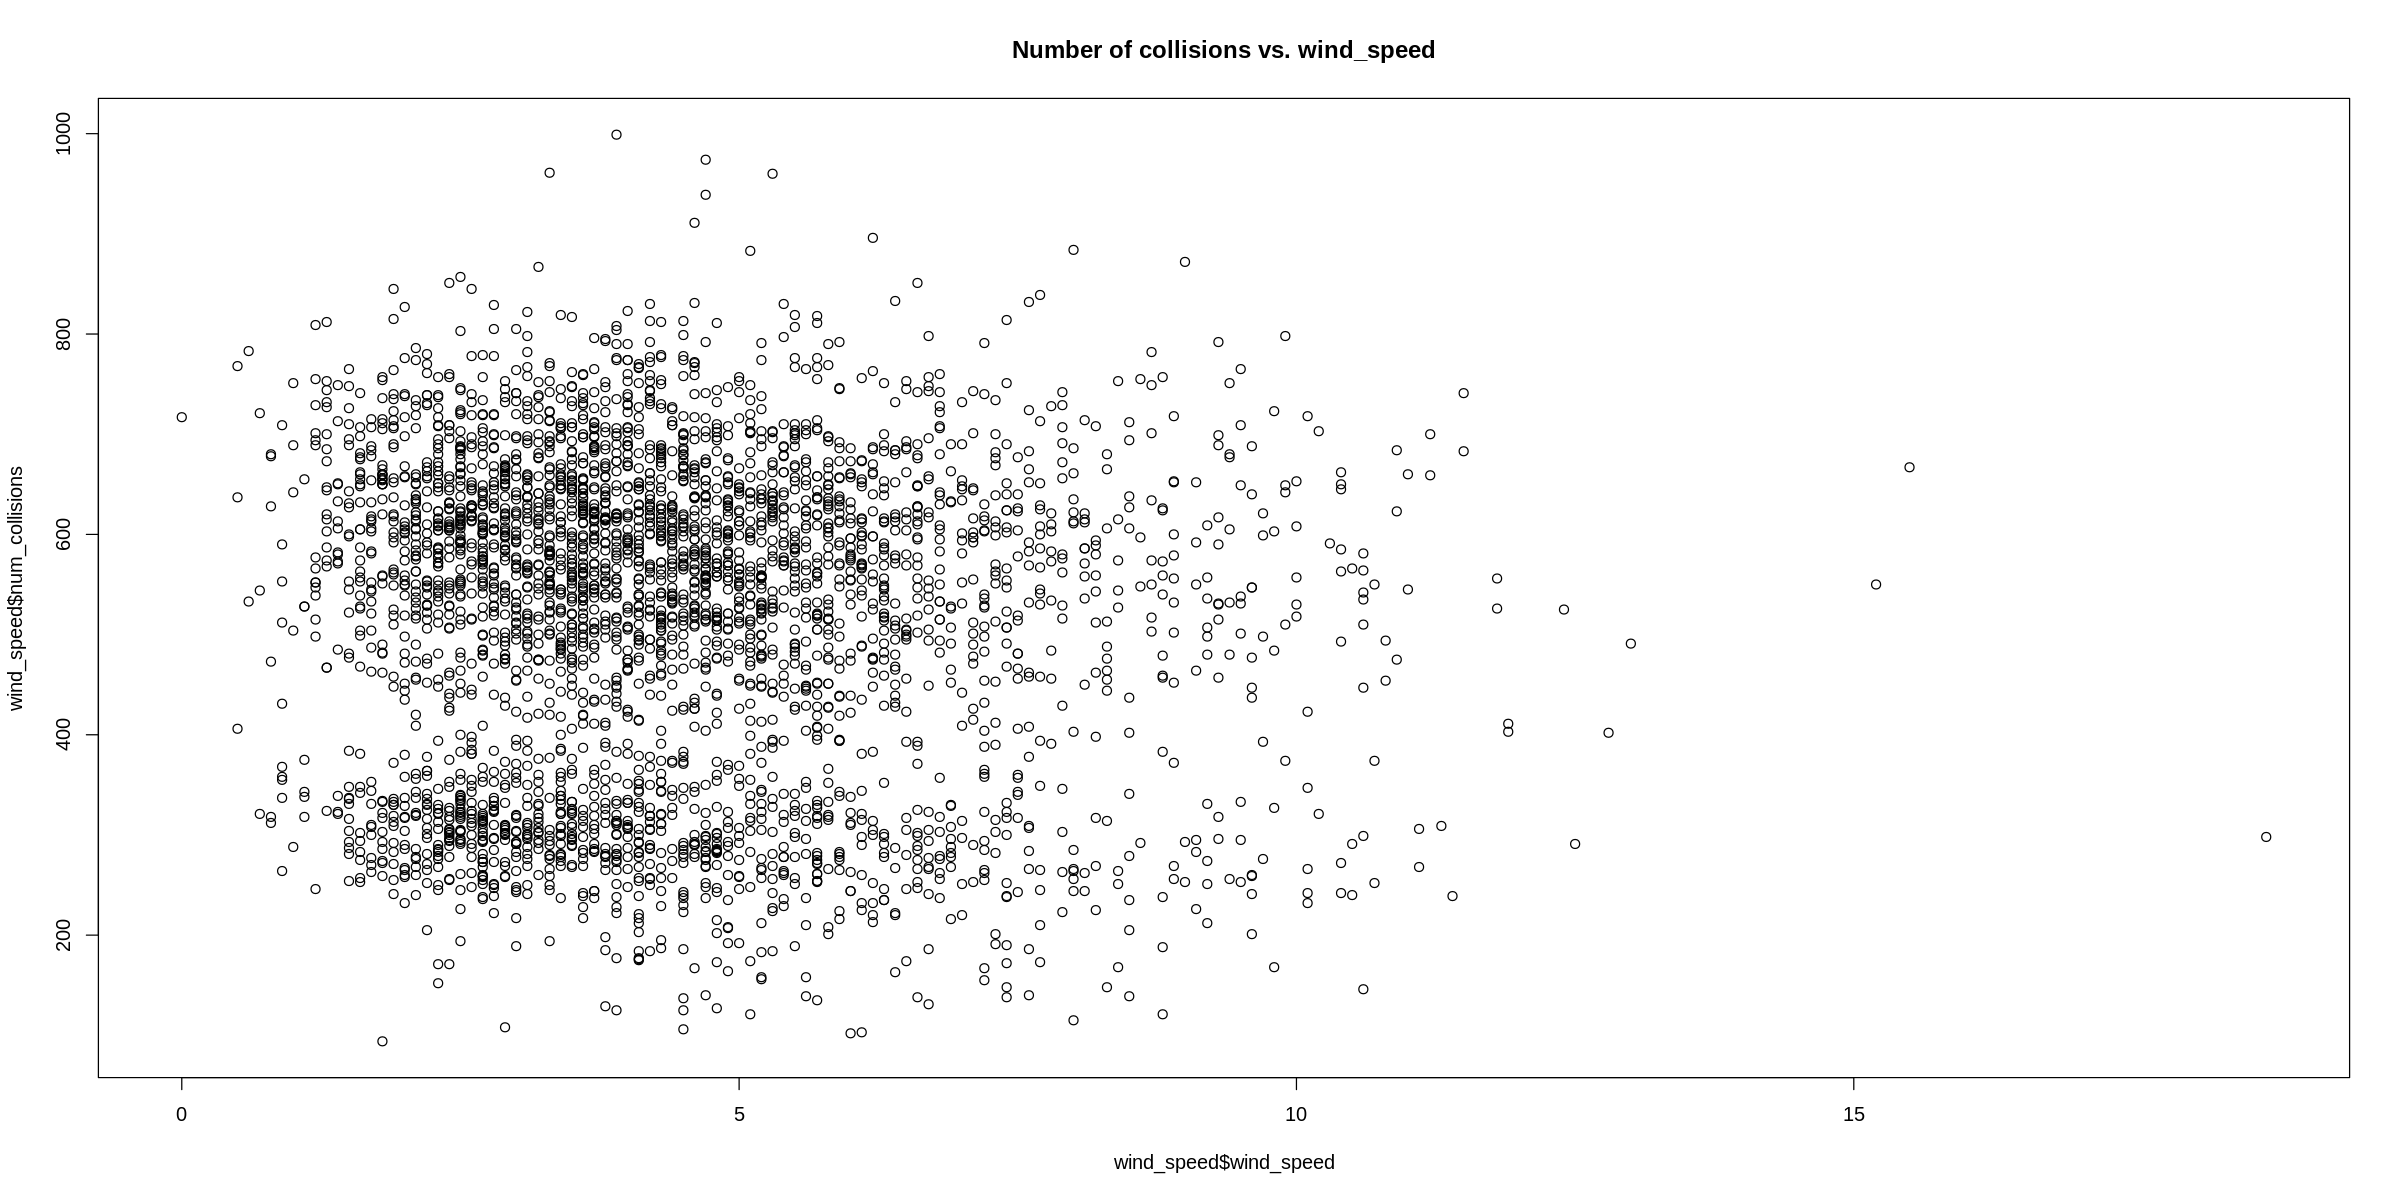

In [ ]:
plot(wind_speed$wind_speed, wind_speed$num_collisions, main="Number of collisions vs. wind_speed")

In [41]:
cor(wind_speed$wind_speed, wind_speed$num_collisions)

[1] -0.06139857

## total precipitation

In [42]:
total_precipitation <- collision_data[ which(collision_data$total_precipitation < 99),]
head(total_precipitation)
summary(total_precipitation$total_precipitation)

,dim_date_year,dim_date_month,dim_date_day_number,collision_date,num_collisions,weather_date,temperature,dew_point,sea_level_pressure,visibility,wind_speed,max_sustained_wind_speed,max_wind_gust,max_temperature,min_temperature,total_precipitation,snow_depth,fog_occurred
,<int>,<int>,<int>,<fct>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,2012,7,7,2012-07-01,538,2012-07-01,83.6,63.0,1008.9,9.7,4.1,9.9,18.1,93,66.0,0.00,999.9,0
2,2012,7,1,2012-07-02,564,2012-07-02,80.3,54.1,1011.6,10.0,3.8,15.0,999.9,88,66.9,0.00,999.9,0
3,2012,7,2,2012-07-03,664,2012-07-03,79.8,56.7,1012.8,10.0,2.9,12.0,999.9,88,63.0,0.00,999.9,0
4,2012,7,3,2012-07-04,432,2012-07-04,81.8,65.6,1009.1,9.2,3.6,11.1,999.9,91,68.0,0.06,999.9,0
6,2012,7,5,2012-07-06,638,2012-07-06,81.9,62.3,1011.7,10.0,3.1,9.9,999.9,91,66.9,0.00,999.9,0
7,2012,7,6,2012-07-07,490,2012-07-07,84.9,65.9,1010.1,9.5,3.1,14.0,17.1,95,70.0,0.00,999.9,0


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.1439  0.0900  7.1200 

[1] 0.01793981

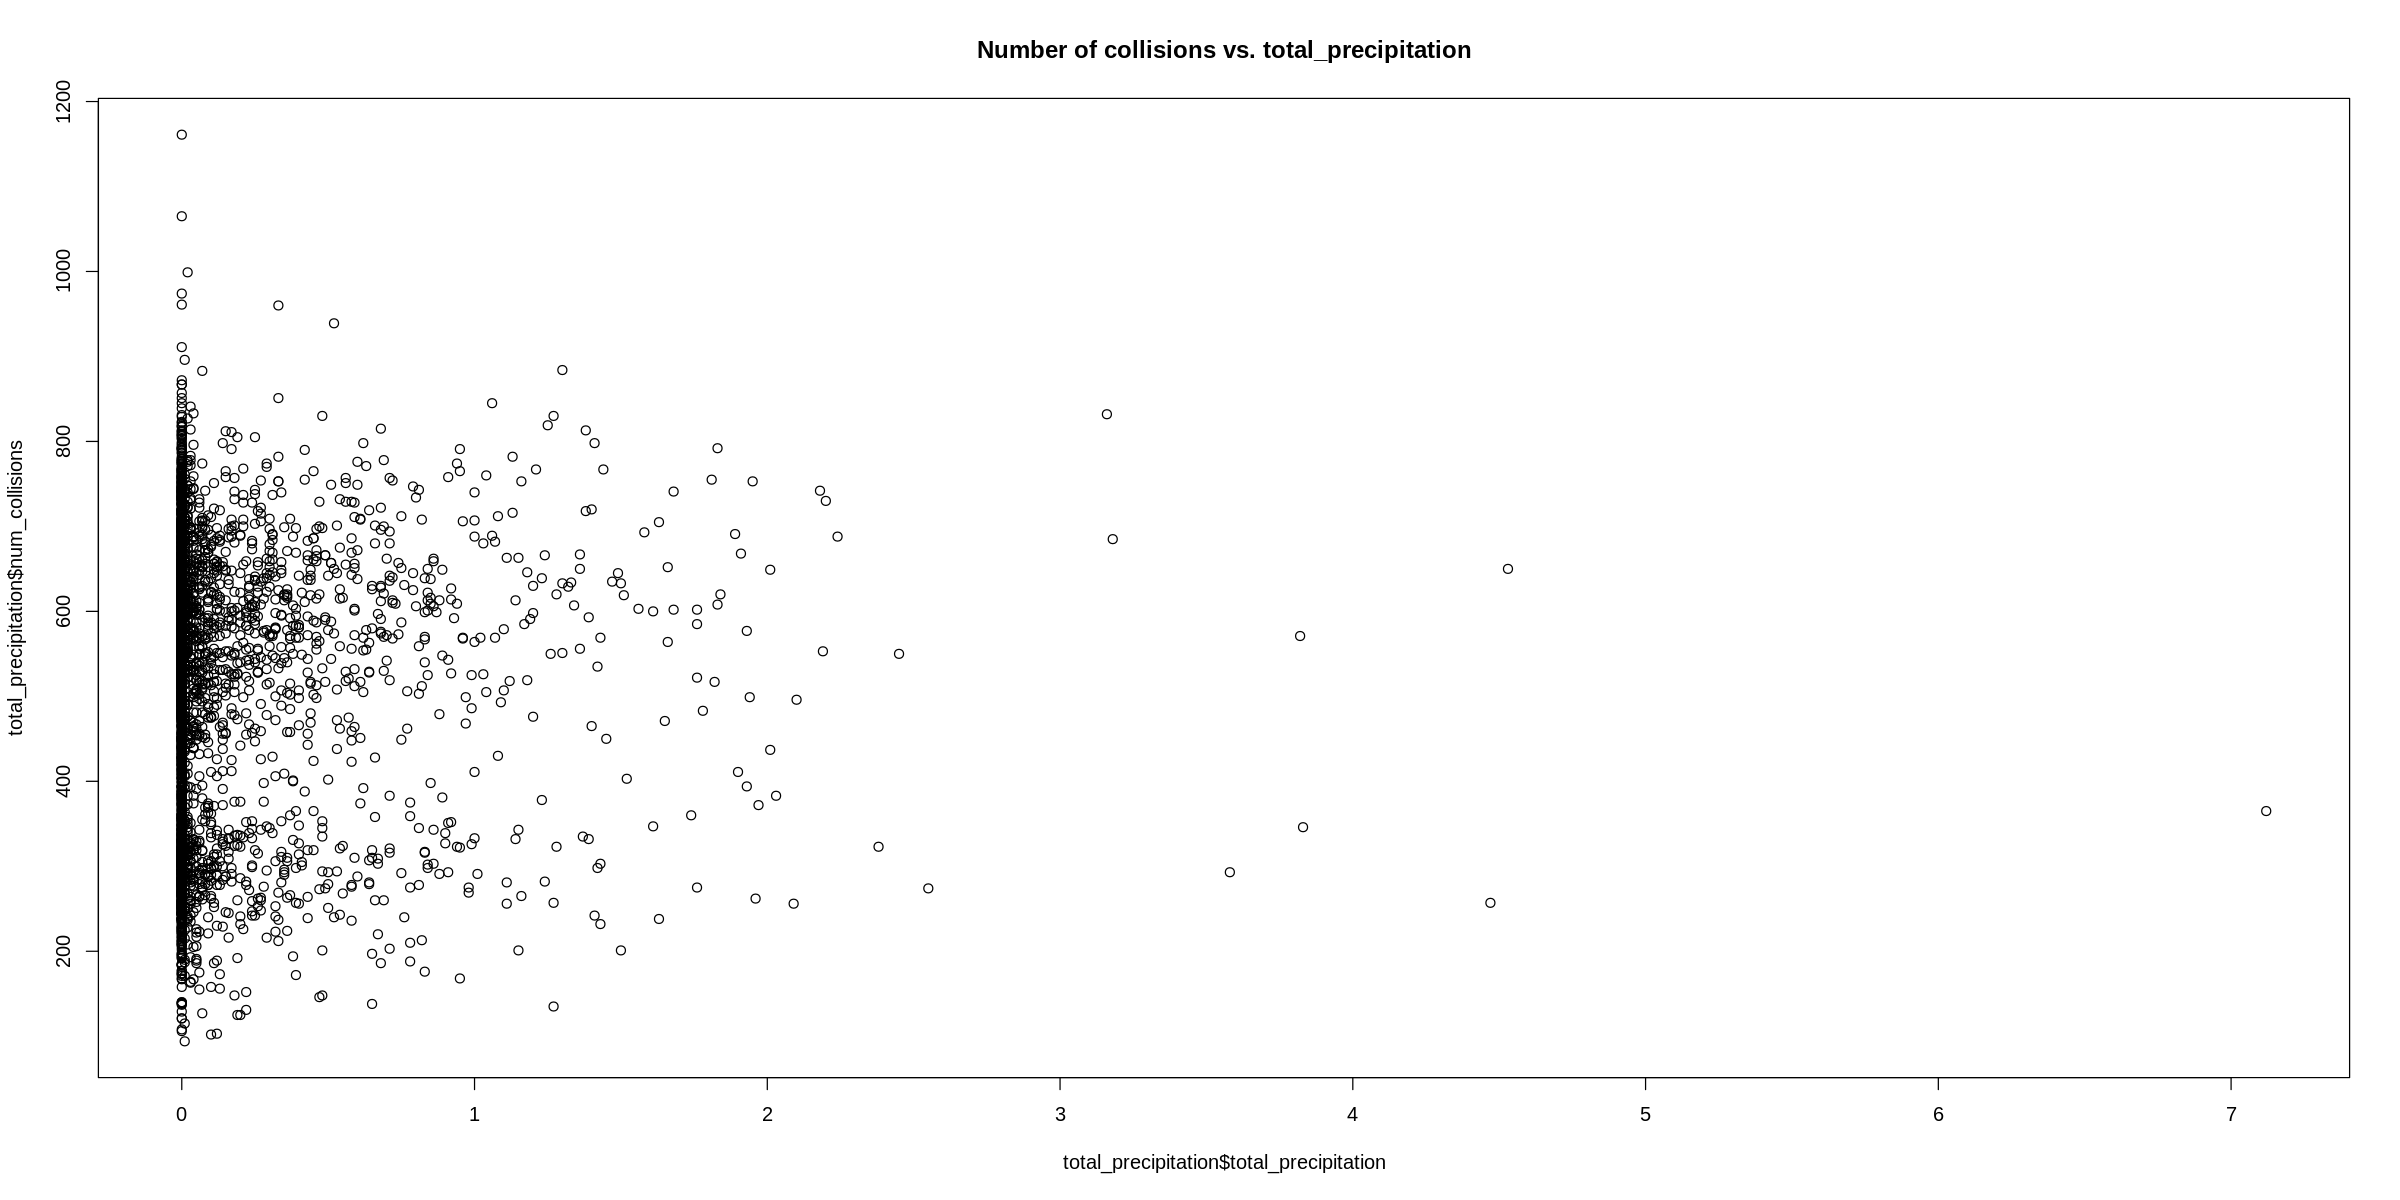

In [43]:
plot(total_precipitation$total_precipitation, total_precipitation$num_collisions, main="Number of collisions vs. total_precipitation")
cor(total_precipitation$total_precipitation, total_precipitation$num_collisions)


## sea_level_pressure

In [51]:
sea_level_pressure <- collision_data[ which(collision_data$sea_level_pressure < 9999),]
head(total_precipitation)
summary(sea_level_pressure$sea_level_pressure)

,dim_date_year,dim_date_month,dim_date_day_number,collision_date,num_collisions,weather_date,temperature,dew_point,sea_level_pressure,visibility,wind_speed,max_sustained_wind_speed,max_wind_gust,max_temperature,min_temperature,total_precipitation,snow_depth,fog_occurred
,<int>,<int>,<int>,<fct>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,2012,7,7,2012-07-01,538,2012-07-01,83.6,63.0,1008.9,9.7,4.1,9.9,18.1,93,66.0,0.00,999.9,0
2,2012,7,1,2012-07-02,564,2012-07-02,80.3,54.1,1011.6,10.0,3.8,15.0,999.9,88,66.9,0.00,999.9,0
3,2012,7,2,2012-07-03,664,2012-07-03,79.8,56.7,1012.8,10.0,2.9,12.0,999.9,88,63.0,0.00,999.9,0
4,2012,7,3,2012-07-04,432,2012-07-04,81.8,65.6,1009.1,9.2,3.6,11.1,999.9,91,68.0,0.06,999.9,0
6,2012,7,5,2012-07-06,638,2012-07-06,81.9,62.3,1011.7,10.0,3.1,9.9,999.9,91,66.9,0.00,999.9,0
7,2012,7,6,2012-07-07,490,2012-07-07,84.9,65.9,1010.1,9.5,3.1,14.0,17.1,95,70.0,0.00,999.9,0


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    989    1012    1017    1017    1022    1042 

[1] -9.086845e-05

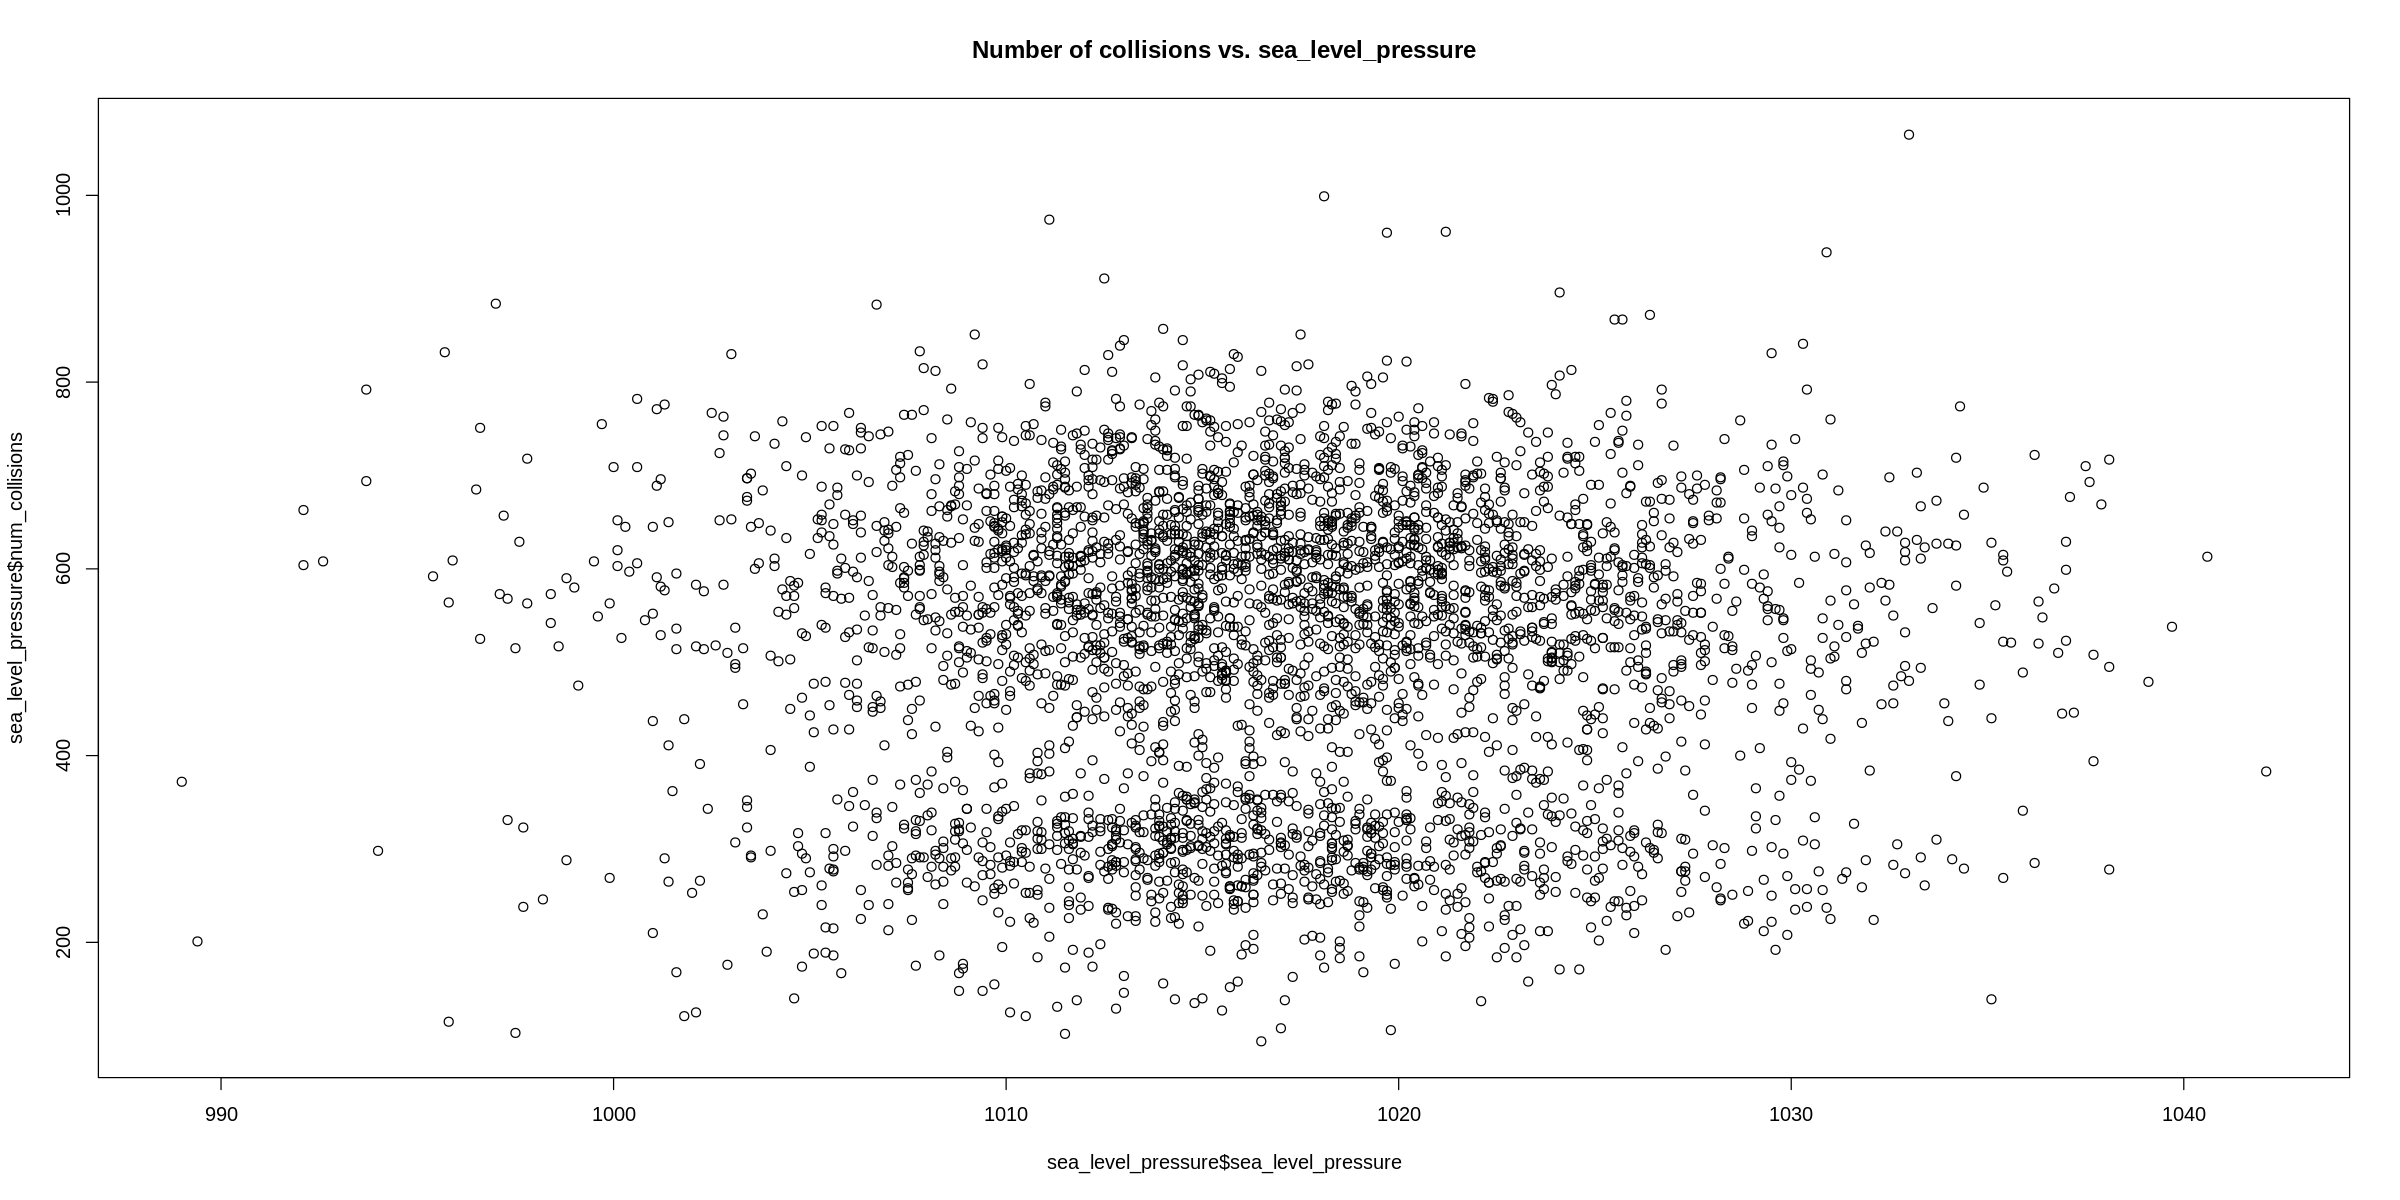

In [52]:
plot(sea_level_pressure$sea_level_pressure, sea_level_pressure$num_collisions, main="Number of collisions vs. sea_level_pressure")
cor(sea_level_pressure$sea_level_pressure, sea_level_pressure$num_collisions)


## normalization and export for linear regression
let's create a dataset without outlier or null value. Exclude max wind gust and snow

In [61]:
collision_data_clean <- collision_data[ which(collision_data$visibility < 999),]
collision_data_clean <- collision_data_clean[ which(collision_data_clean$sea_level_pressure < 9999),]
collision_data_clean <- collision_data_clean[ which(collision_data_clean$wind_speed < 999),]
# collision_data_clean <- collision_data_clean[ which(collision_data_clean$max_wind_gust < 999),]
collision_data_clean <- collision_data_clean[ which(collision_data_clean$total_precipitation < 99),]
# collision_data_clean <- collision_data_clean[ which(collision_data_clean$snow_depth < 999),]
dim(collision_data_clean)
#head(collision_data_clean)
#tail(collision_data_clean)
#summary(collision_data_clean)
head(collision_data_clean)
ncol(collision_data_clean)


[1] 3521   18

,dim_date_year,dim_date_month,dim_date_day_number,collision_date,num_collisions,weather_date,temperature,dew_point,sea_level_pressure,visibility,wind_speed,max_sustained_wind_speed,max_wind_gust,max_temperature,min_temperature,total_precipitation,snow_depth,fog_occurred
,<int>,<int>,<int>,<fct>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,2012,7,7,2012-07-01,538,2012-07-01,83.6,63.0,1008.9,9.7,4.1,9.9,18.1,93,66.0,0.00,999.9,0
2,2012,7,1,2012-07-02,564,2012-07-02,80.3,54.1,1011.6,10.0,3.8,15.0,999.9,88,66.9,0.00,999.9,0
3,2012,7,2,2012-07-03,664,2012-07-03,79.8,56.7,1012.8,10.0,2.9,12.0,999.9,88,63.0,0.00,999.9,0
4,2012,7,3,2012-07-04,432,2012-07-04,81.8,65.6,1009.1,9.2,3.6,11.1,999.9,91,68.0,0.06,999.9,0
6,2012,7,5,2012-07-06,638,2012-07-06,81.9,62.3,1011.7,10.0,3.1,9.9,999.9,91,66.9,0.00,999.9,0
7,2012,7,6,2012-07-07,490,2012-07-07,84.9,65.9,1010.1,9.5,3.1,14.0,17.1,95,70.0,0.00,999.9,0


[1] 18

Now remove the colum that are not interesting


In [62]:
collision_data_clean <- collision_data_clean[,-1:-2] # remove dim_date_year, dim_date_month
collision_data_clean <- collision_data_clean[,-2] # remove collision_date
collision_data_clean <- collision_data_clean[,-3] #remove weather_date
collision_data_clean <- collision_data_clean[,-13:-14] #remove snow_depth,	fog_occurred
collision_data_clean <- collision_data_clean[,-9] # remove max_wind_gust
## then move num_collisions as first column
collision_data_clean <- collision_data_clean %>% relocate(num_collisions, .before = dim_date_day_number)
head(collision_data_clean)
summary(collision_data_clean)
sd(collision_data_clean$num_collisions)


,num_collisions,dim_date_day_number,temperature,dew_point,sea_level_pressure,visibility,wind_speed,max_sustained_wind_speed,max_temperature,min_temperature,total_precipitation
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,538,7,83.6,63.0,1008.9,9.7,4.1,9.9,93,66.0,0.00
2,564,1,80.3,54.1,1011.6,10.0,3.8,15.0,88,66.9,0.00
3,664,2,79.8,56.7,1012.8,10.0,2.9,12.0,88,63.0,0.00
4,432,3,81.8,65.6,1009.1,9.2,3.6,11.1,91,68.0,0.06
6,638,5,81.9,62.3,1011.7,10.0,3.1,9.9,91,66.9,0.00
7,490,6,84.9,65.9,1010.1,9.5,3.1,14.0,95,70.0,0.00


 num_collisions  dim_date_day_number  temperature      dew_point    
 Min.   : 94.0   Min.   :1           Min.   : 6.90   Min.   :-16.1  
 1st Qu.:361.0   1st Qu.:2           1st Qu.:43.30   1st Qu.: 27.8  
 Median :547.0   Median :4           Median :58.20   Median : 44.8  
 Mean   :513.4   Mean   :4           Mean   :57.04   Mean   : 42.6  
 3rd Qu.:633.0   3rd Qu.:6           3rd Qu.:72.50   3rd Qu.: 58.8  
 Max.   :999.0   Max.   :7           Max.   :89.10   Max.   : 74.8  
 sea_level_pressure   visibility       wind_speed    max_sustained_wind_speed
 Min.   : 989       Min.   : 0.700   Min.   : 0.00   Min.   : 2.900          
 1st Qu.:1012       1st Qu.: 8.500   1st Qu.: 2.90   1st Qu.: 7.000          
 Median :1017       Median : 9.800   Median : 4.10   Median : 8.900          
 Mean   :1017       Mean   : 9.009   Mean   : 4.49   Mean   : 9.634          
 3rd Qu.:1022       3rd Qu.:10.000   3rd Qu.: 5.70   3rd Qu.:11.100          
 Max.   :1042       Max.   :10.000   Max.   :18.7

[1] 160.8796

In [ ]:
collision_data_clean[100,]

,num_collisions,dim_date_day_number,temperature,dew_point,sea_level_pressure,visibility,wind_speed,max_sustained_wind_speed,max_temperature,min_temperature,total_precipitation
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
101,570,2,53.8,48.5,1022.3,8.5,5.6,18.1,57.2,50,0.46


In [ ]:
# wind_speed_numeric <- collision_data_clean[ , unlist(lapply(collision_data_clean, is.numeric))]
#wind_speed_numeric <- collision_data_clean[ , unlist(lapply(collision_data_clean, is.numeric))]
collision_data_clean[,1] <- scale(collision_data_clean[,1])
head(collision_data_clean)
summary(collision_data_clean)

,num_collisions,dim_date_day_number,temperature,dew_point,sea_level_pressure,visibility,wind_speed,max_sustained_wind_speed,max_temperature,min_temperature,total_precipitation
,"<dbl[,1]>",<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.1529736,7,83.6,63.0,1008.9,9.7,4.1,9.9,93,66.0,0.00
2,0.3145851,1,80.3,54.1,1011.6,10.0,3.8,15.0,88,66.9,0.00
3,0.9361678,2,79.8,56.7,1012.8,10.0,2.9,12.0,88,63.0,0.00
4,-0.5059040,3,81.8,65.6,1009.1,9.2,3.6,11.1,91,68.0,0.06
6,0.7745563,5,81.9,62.3,1011.7,10.0,3.1,9.9,91,66.9,0.00
7,-0.1453861,6,84.9,65.9,1010.1,9.5,3.1,14.0,95,70.0,0.00


  num_collisions.V1   dim_date_day_number  temperature      dew_point    
 Min.   :-2.6068535   Min.   :1           Min.   : 6.90   Min.   :-16.1  
 1st Qu.:-0.9472277   1st Qu.:2           1st Qu.:43.30   1st Qu.: 27.8  
 Median : 0.2089160   Median :4           Median :58.20   Median : 44.8  
 Mean   : 0.0000000   Mean   :4           Mean   :57.04   Mean   : 42.6  
 3rd Qu.: 0.7434771   3rd Qu.:6           3rd Qu.:72.50   3rd Qu.: 58.8  
 Max.   : 3.0184697   Max.   :7           Max.   :89.10   Max.   : 74.8  
 sea_level_pressure   visibility       wind_speed    max_sustained_wind_speed
 Min.   : 989       Min.   : 0.700   Min.   : 0.00   Min.   : 2.900          
 1st Qu.:1012       1st Qu.: 8.500   1st Qu.: 2.90   1st Qu.: 7.000          
 Median :1017       Median : 9.800   Median : 4.10   Median : 8.900          
 Mean   :1017       Mean   : 9.009   Mean   : 4.49   Mean   : 9.634          
 3rd Qu.:1022       3rd Qu.:10.000   3rd Qu.: 5.70   3rd Qu.:11.100          
 Max.   :1042 

In [ ]:
# then export

write.csv(collision_data_clean, file="/content/collision_data_clean.csv")

## Other analysis: temperature by year

In [ ]:
temp_2020 <- collision_data[ which(collision_data$dim_date_year == 2020),]
tail(temp_2020)

,dim_date_year,dim_date_month,dim_date_day_number,collision_date,num_collisions,weather_date,temperature,dew_point,sea_level_pressure,visibility,wind_speed,max_sustained_wind_speed,max_wind_gust,max_temperature,min_temperature,total_precipitation,snow_depth,fog_occurred
,<int>,<int>,<int>,<fct>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
3101,2020,12,6,2020-12-26,226,2020-12-26,28.8,13.9,1010.6,10.0,9.1,15.0,25.1,35.1,24.1,0.21,999.9,0
3102,2020,12,7,2020-12-27,184,2020-12-27,29.5,14.5,1022.5,10.0,4.2,8.9,14.0,37.0,24.1,0.00,999.9,0
3103,2020,12,1,2020-12-28,217,2020-12-28,42.3,28.7,1022.3,10.0,4.1,6.0,15.0,50.0,24.1,0.00,999.9,0
3104,2020,12,2,2020-12-29,244,2020-12-29,39.2,18.2,1025.6,10.0,8.1,15.0,22.9,50.0,34.0,0.00,999.9,0
3105,2020,12,3,2020-12-30,238,2020-12-30,33.4,15.3,1030.4,10.0,3.9,11.1,17.1,43.0,28.0,0.00,999.9,0
3106,2020,12,4,2020-12-31,278,2020-12-31,43.9,33.8,1019.1,8.3,5.5,11.1,22.9,48.0,28.0,0.09,999.9,1


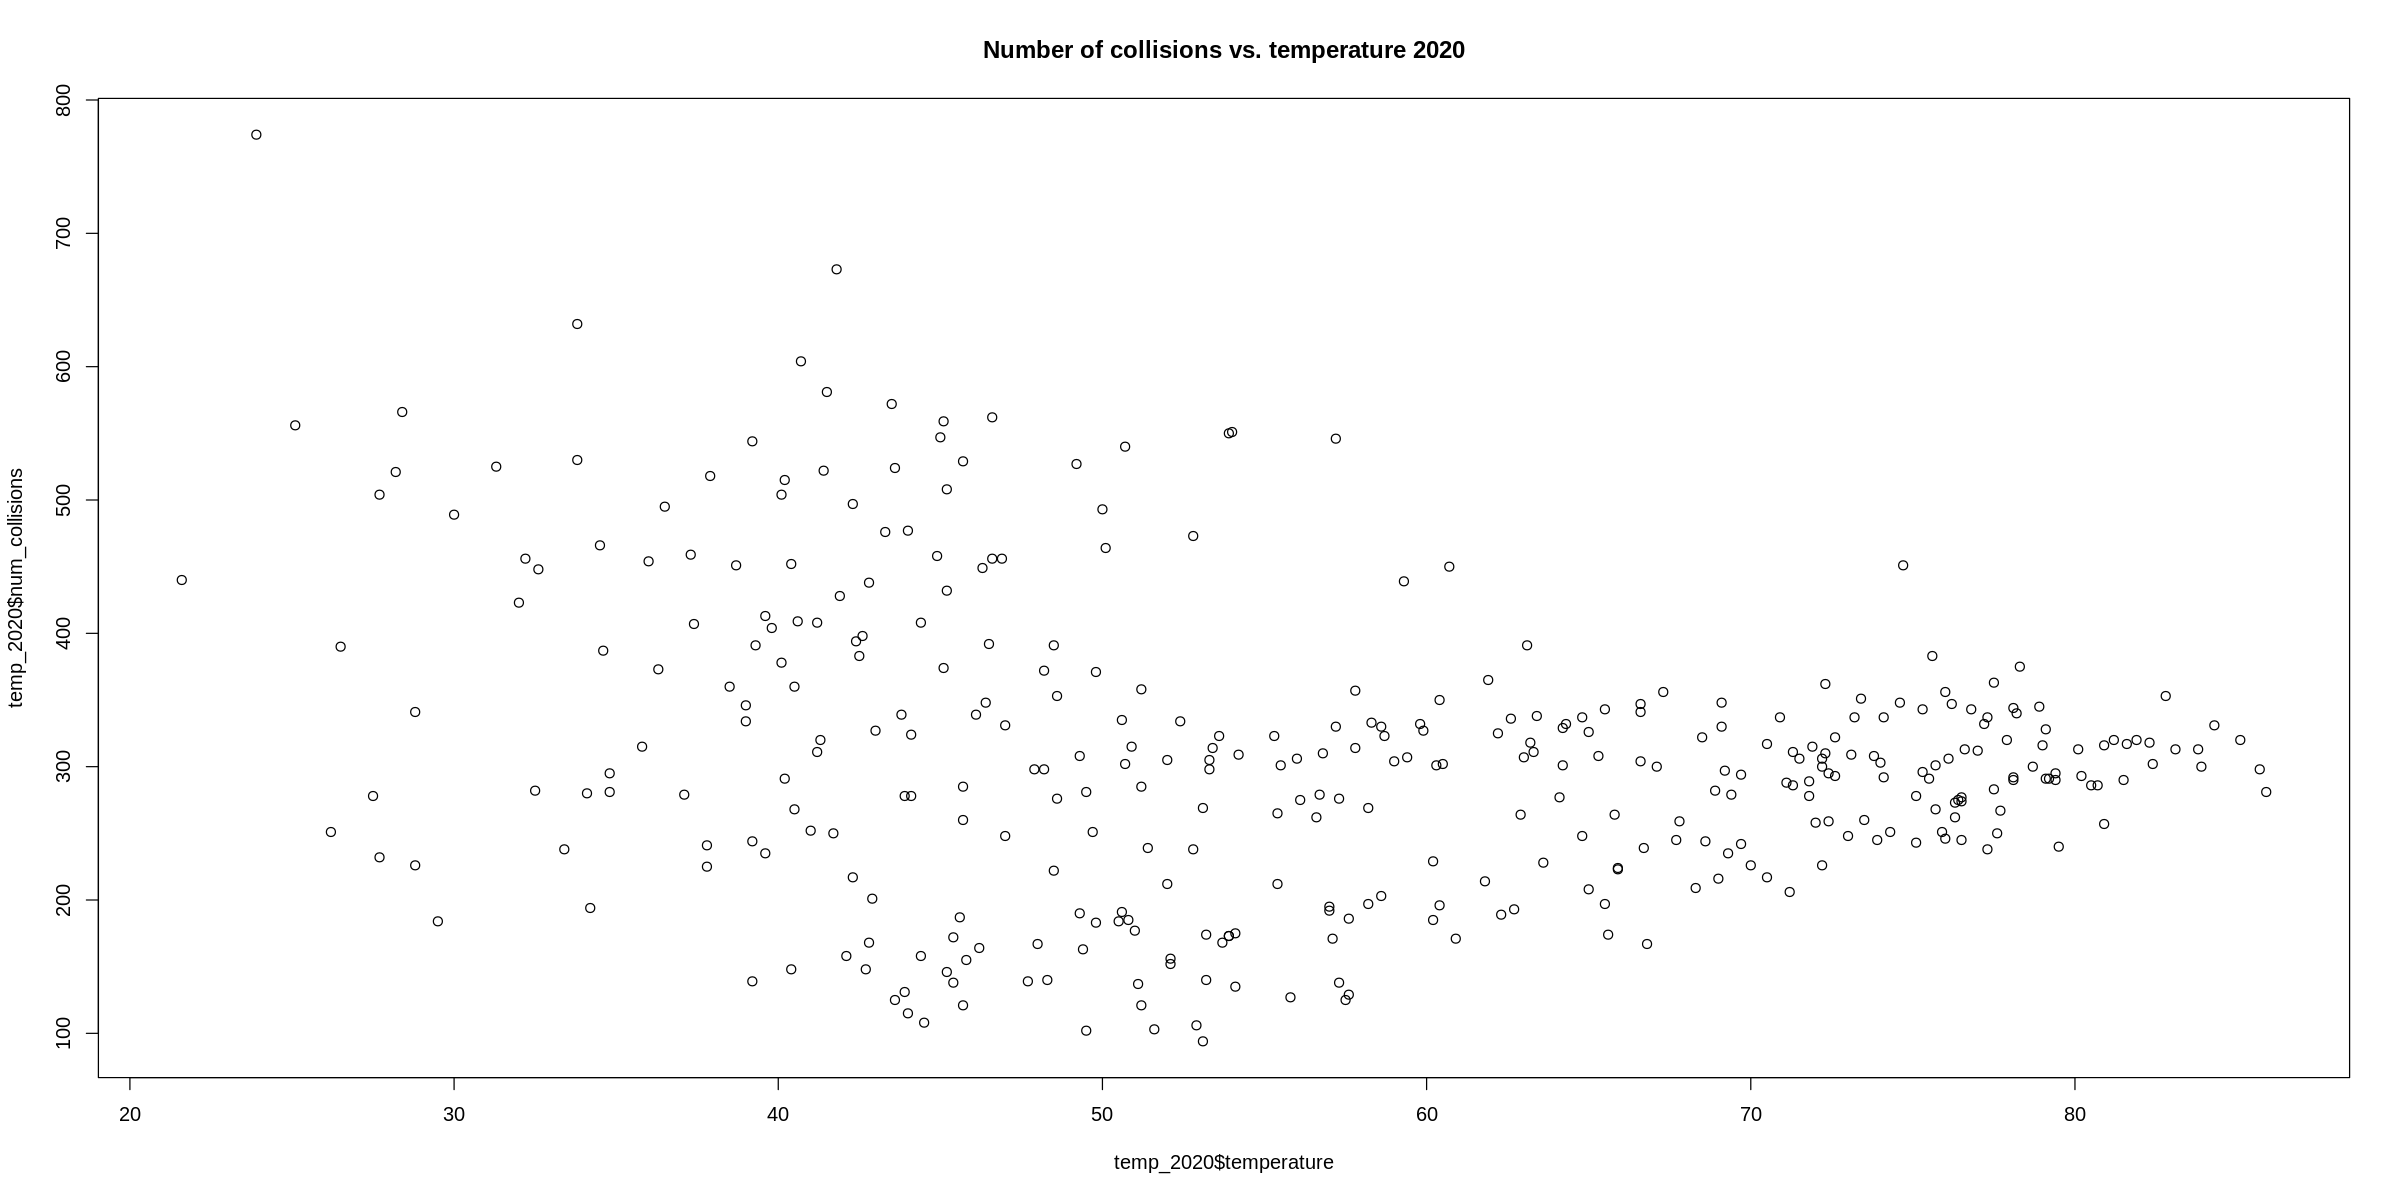

In [ ]:
plot(temp_2020$temperature, temp_2020$num_collisions, main="Number of collisions vs. temperature 2020")

In [ ]:
cor(temp_2020$temperature, temp_2020$num_collisions)

[1] -0.2349401

In [ ]:
temp_2021 <- collision_data[ which(collision_data$dim_date_year == 2021),]
# row.names(temp_2021) <- NULL
head(temp_2021)
tail(temp_2021)

,dim_date_year,dim_date_month,dim_date_day_number,collision_date,num_collisions,weather_date,temperature,dew_point,sea_level_pressure,visibility,wind_speed,max_sustained_wind_speed,max_wind_gust,max_temperature,min_temperature,total_precipitation,snow_depth,fog_occurred
,<int>,<int>,<int>,<fct>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
3107,2021,1,5,2021-01-01,257,2021-01-01,36.5,24.6,1030.1,9.8,4.4,8.9,999.9,48.0,33.1,0.39,999.9,1
3108,2021,1,6,2021-01-02,220,2021-01-02,41.5,35.3,1012.8,5.9,6.2,9.9,21.0,51.1,33.1,0.67,999.9,1
3109,2021,1,7,2021-01-03,186,2021-01-03,36.6,29.9,1018.0,8.4,6.7,12.0,22.0,51.1,34.0,0.05,999.9,1
3110,2021,1,1,2021-01-04,242,2021-01-04,37.7,32.1,1014.5,9.2,5.3,11.1,18.1,43.0,34.0,0.24,999.9,1
3111,2021,1,2,2021-01-05,228,2021-01-05,38.4,29.6,1013.1,10.0,3.9,7.0,999.9,43.0,35.1,0.02,999.9,0
3112,2021,1,3,2021-01-06,220,2021-01-06,37.4,26.5,1014.4,10.0,6.4,15.0,22.0,42.1,35.1,0.00,999.9,0


,dim_date_year,dim_date_month,dim_date_day_number,collision_date,num_collisions,weather_date,temperature,dew_point,sea_level_pressure,visibility,wind_speed,max_sustained_wind_speed,max_wind_gust,max_temperature,min_temperature,total_precipitation,snow_depth,fog_occurred
,<int>,<int>,<int>,<fct>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
3466,2021,12,7,2021-12-26,186,2021-12-26,46.8,33.7,1008.3,9.7,7.6,13.0,24.1,52.0,36,0.11,999.9,0
3467,2021,12,1,2021-12-27,207,2021-12-27,37.4,22.5,1017.8,10.0,4.9,11.1,19.0,51.1,34,0.00,999.9,0
3468,2021,12,2,2021-12-28,221,2021-12-28,40.0,33.3,1010.7,7.4,4.1,8.9,999.9,46.9,34,0.09,999.9,1
3469,2021,12,3,2021-12-29,192,2021-12-29,42.6,37.4,1011.7,6.3,5.0,11.1,14.0,46.9,36,0.19,999.9,1
3470,2021,12,4,2021-12-30,222,2021-12-30,45.0,41.7,1013.8,4.7,2.8,6.0,999.9,48.9,41,0.05,999.9,1
3471,2021,12,5,2021-12-31,232,2021-12-31,50.2,45.6,1013.8,6.3,2.0,7.0,999.9,55.0,43,0.00,999.9,0


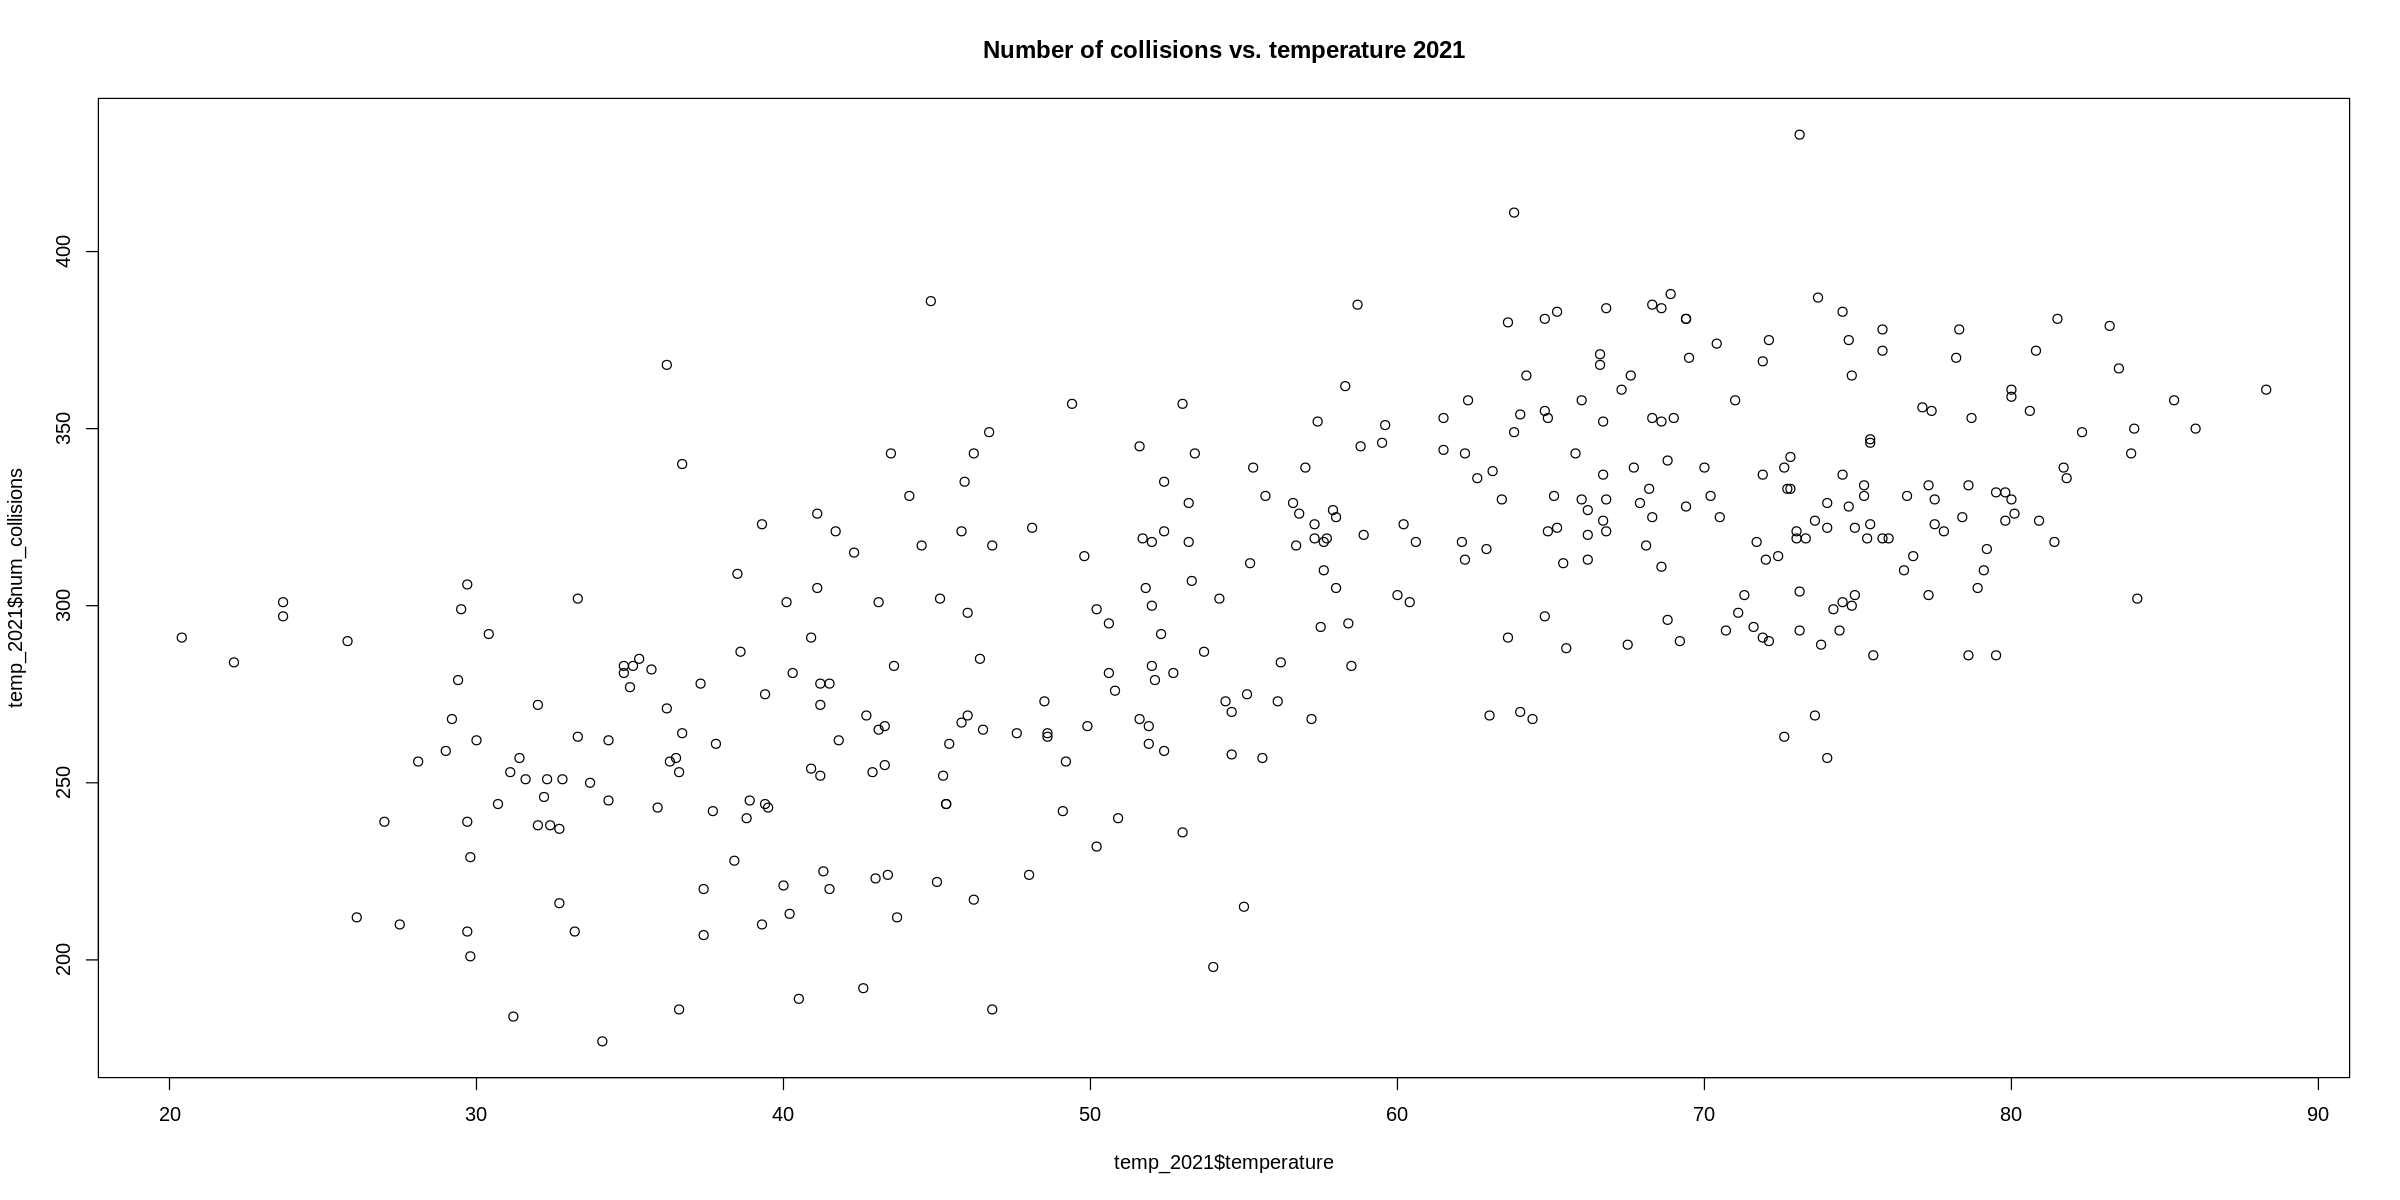

In [ ]:
plot(temp_2021$temperature, temp_2021$num_collisions, main="Number of collisions vs. temperature 2021")

In [ ]:
cor(temp_2021$temperature, temp_2021$num_collisions)

[1] 0.6470491

In [ ]:
temp_2019 <- collision_data[ which(collision_data$dim_date_year == 2019),]
# row.names(temp_2021) <- NULL
tail(temp_2019)

,dim_date_year,dim_date_month,dim_date_day_number,collision_date,num_collisions,weather_date,temperature,dew_point,sea_level_pressure,visibility,wind_speed,max_sustained_wind_speed,max_wind_gust,max_temperature,min_temperature,total_precipitation,snow_depth,fog_occurred
,<int>,<int>,<int>,<fct>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
2735,2019,12,4,2019-12-26,414,2019-12-26,39.8,34.3,1024.3,8.1,5.1,11.1,999.9,46.9,32.0,0.00,999.9,0
2736,2019,12,5,2019-12-27,448,2019-12-27,49.4,40.9,1024.7,9.9,4.7,9.9,18.1,54.0,36.0,0.00,999.9,0
2737,2019,12,6,2019-12-28,355,2019-12-28,48.0,37.4,1021.5,8.3,3.8,7.0,999.9,54.0,45.0,0.00,999.9,0
2738,2019,12,7,2019-12-29,384,2019-12-29,42.6,30.2,1022.7,9.3,3.1,8.0,999.9,51.1,39.9,0.00,999.9,0
2739,2019,12,1,2019-12-30,518,2019-12-30,39.4,38.3,1012.4,2.7,10.0,20.0,34.0,41.0,37.4,0.56,999.9,1
2740,2019,12,2,2019-12-31,443,2019-12-31,38.7,34.9,1005.0,9.5,5.3,14.0,24.1,44.1,36.0,0.43,999.9,0


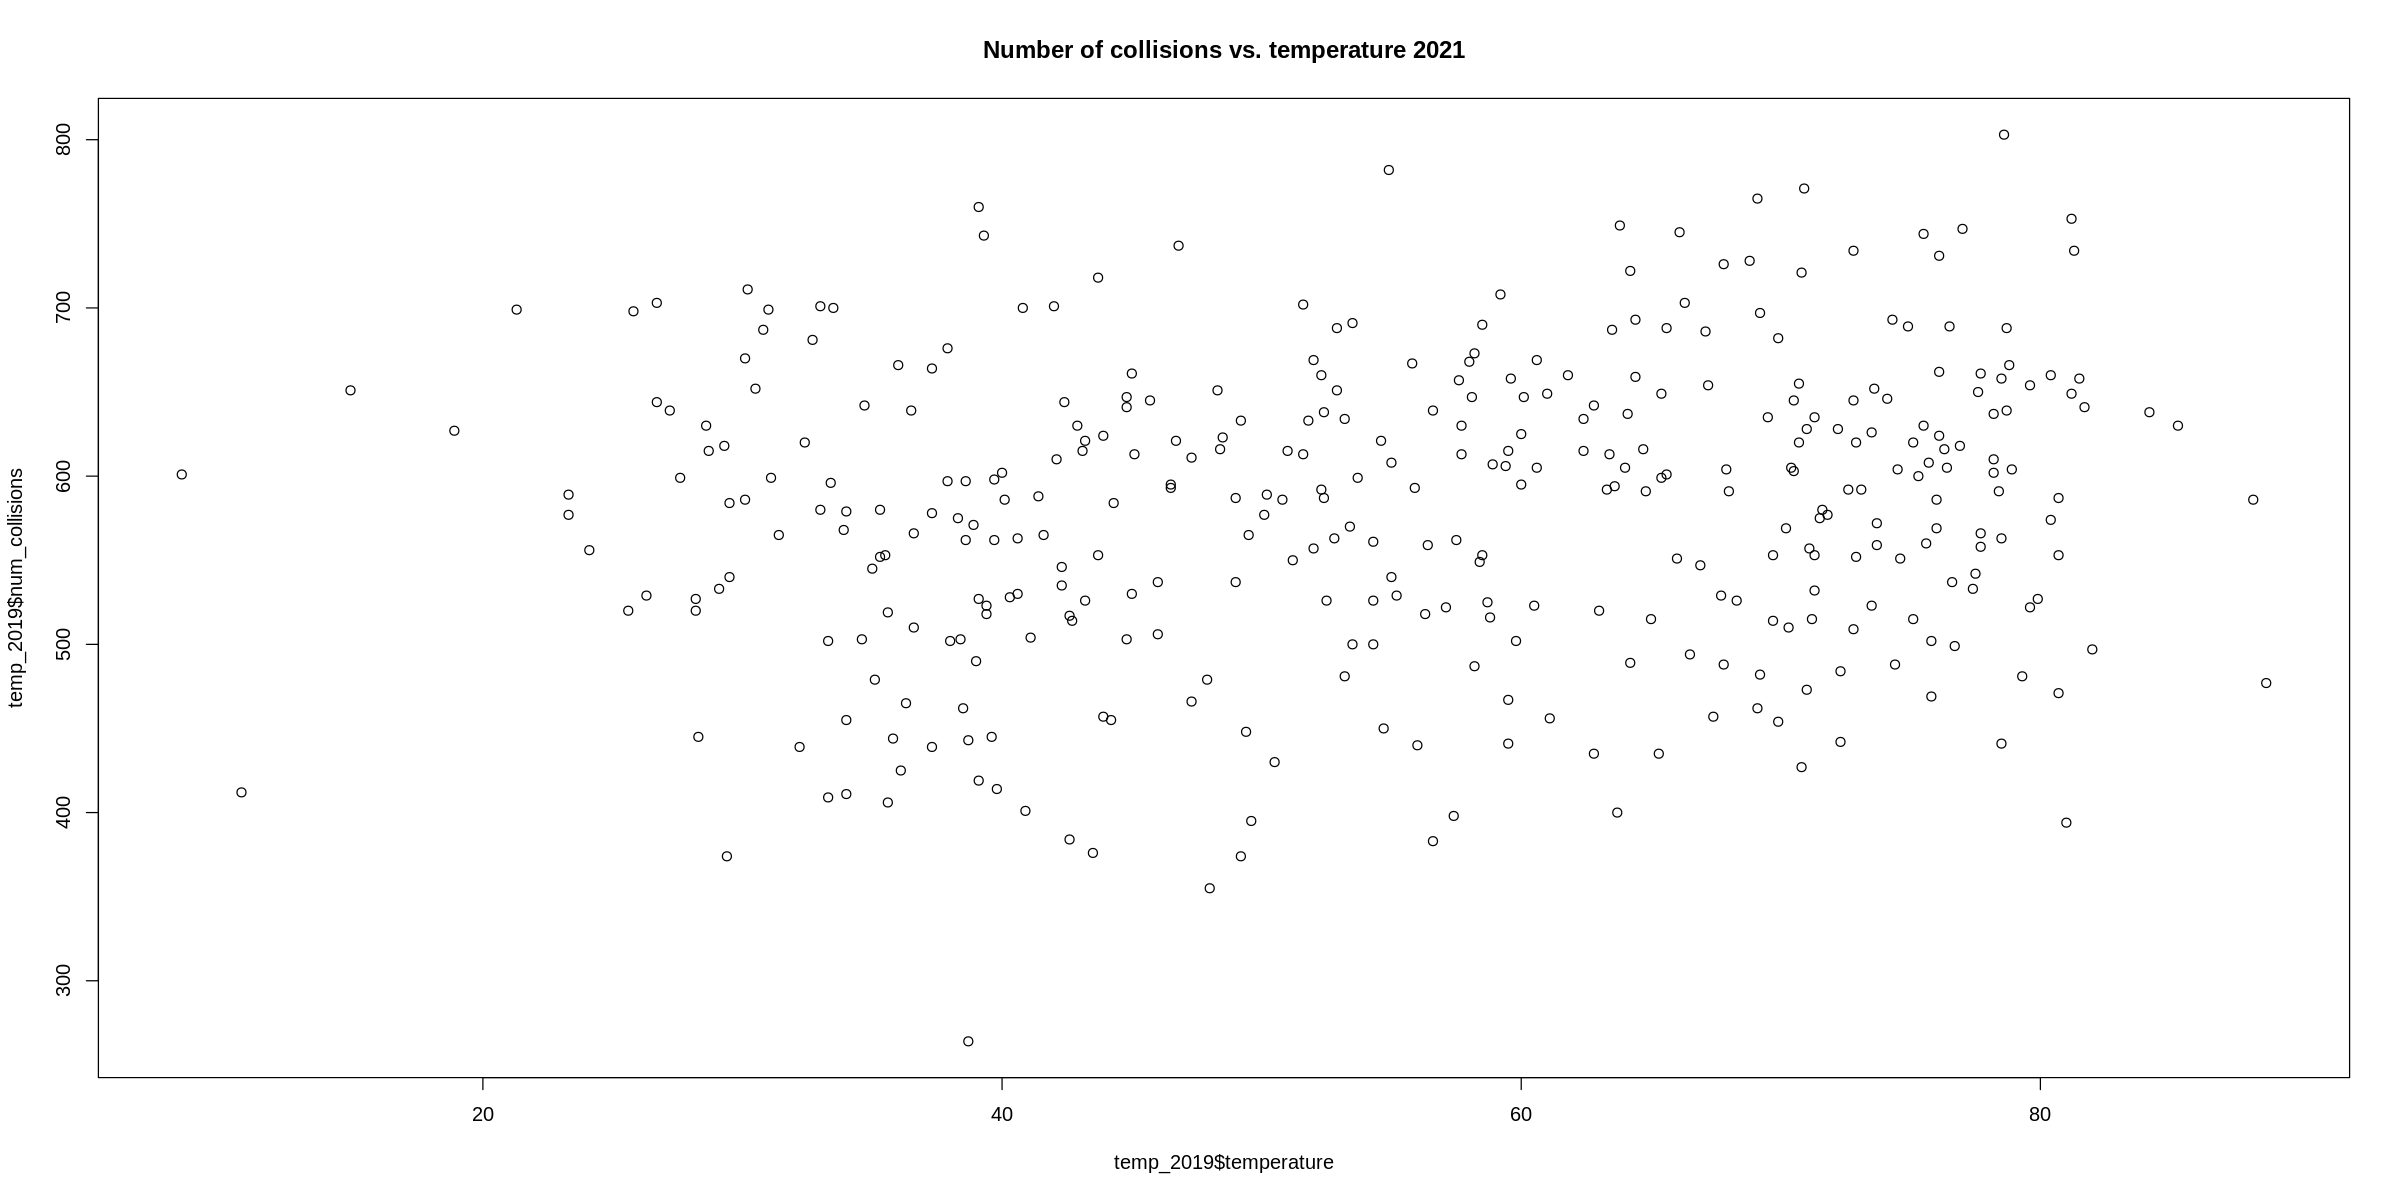

In [ ]:
plot(temp_2019$temperature, temp_2019$num_collisions, main="Number of collisions vs. temperature 2021")

In [ ]:
cor(temp_2019$temperature, temp_2019$num_collisions)

[1] 0.145116

In [ ]:
temp_2018 <- collision_data[ which(collision_data$dim_date_year == 2018),]
# row.names(temp_2021) <- NULL
tail(temp_2019)

,dim_date_year,dim_date_month,dim_date_day_number,collision_date,num_collisions,weather_date,temperature,dew_point,sea_level_pressure,visibility,wind_speed,max_sustained_wind_speed,max_wind_gust,max_temperature,min_temperature,total_precipitation,snow_depth,fog_occurred
,<int>,<int>,<int>,<fct>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
2735,2019,12,4,2019-12-26,414,2019-12-26,39.8,34.3,1024.3,8.1,5.1,11.1,999.9,46.9,32.0,0.00,999.9,0
2736,2019,12,5,2019-12-27,448,2019-12-27,49.4,40.9,1024.7,9.9,4.7,9.9,18.1,54.0,36.0,0.00,999.9,0
2737,2019,12,6,2019-12-28,355,2019-12-28,48.0,37.4,1021.5,8.3,3.8,7.0,999.9,54.0,45.0,0.00,999.9,0
2738,2019,12,7,2019-12-29,384,2019-12-29,42.6,30.2,1022.7,9.3,3.1,8.0,999.9,51.1,39.9,0.00,999.9,0
2739,2019,12,1,2019-12-30,518,2019-12-30,39.4,38.3,1012.4,2.7,10.0,20.0,34.0,41.0,37.4,0.56,999.9,1
2740,2019,12,2,2019-12-31,443,2019-12-31,38.7,34.9,1005.0,9.5,5.3,14.0,24.1,44.1,36.0,0.43,999.9,0


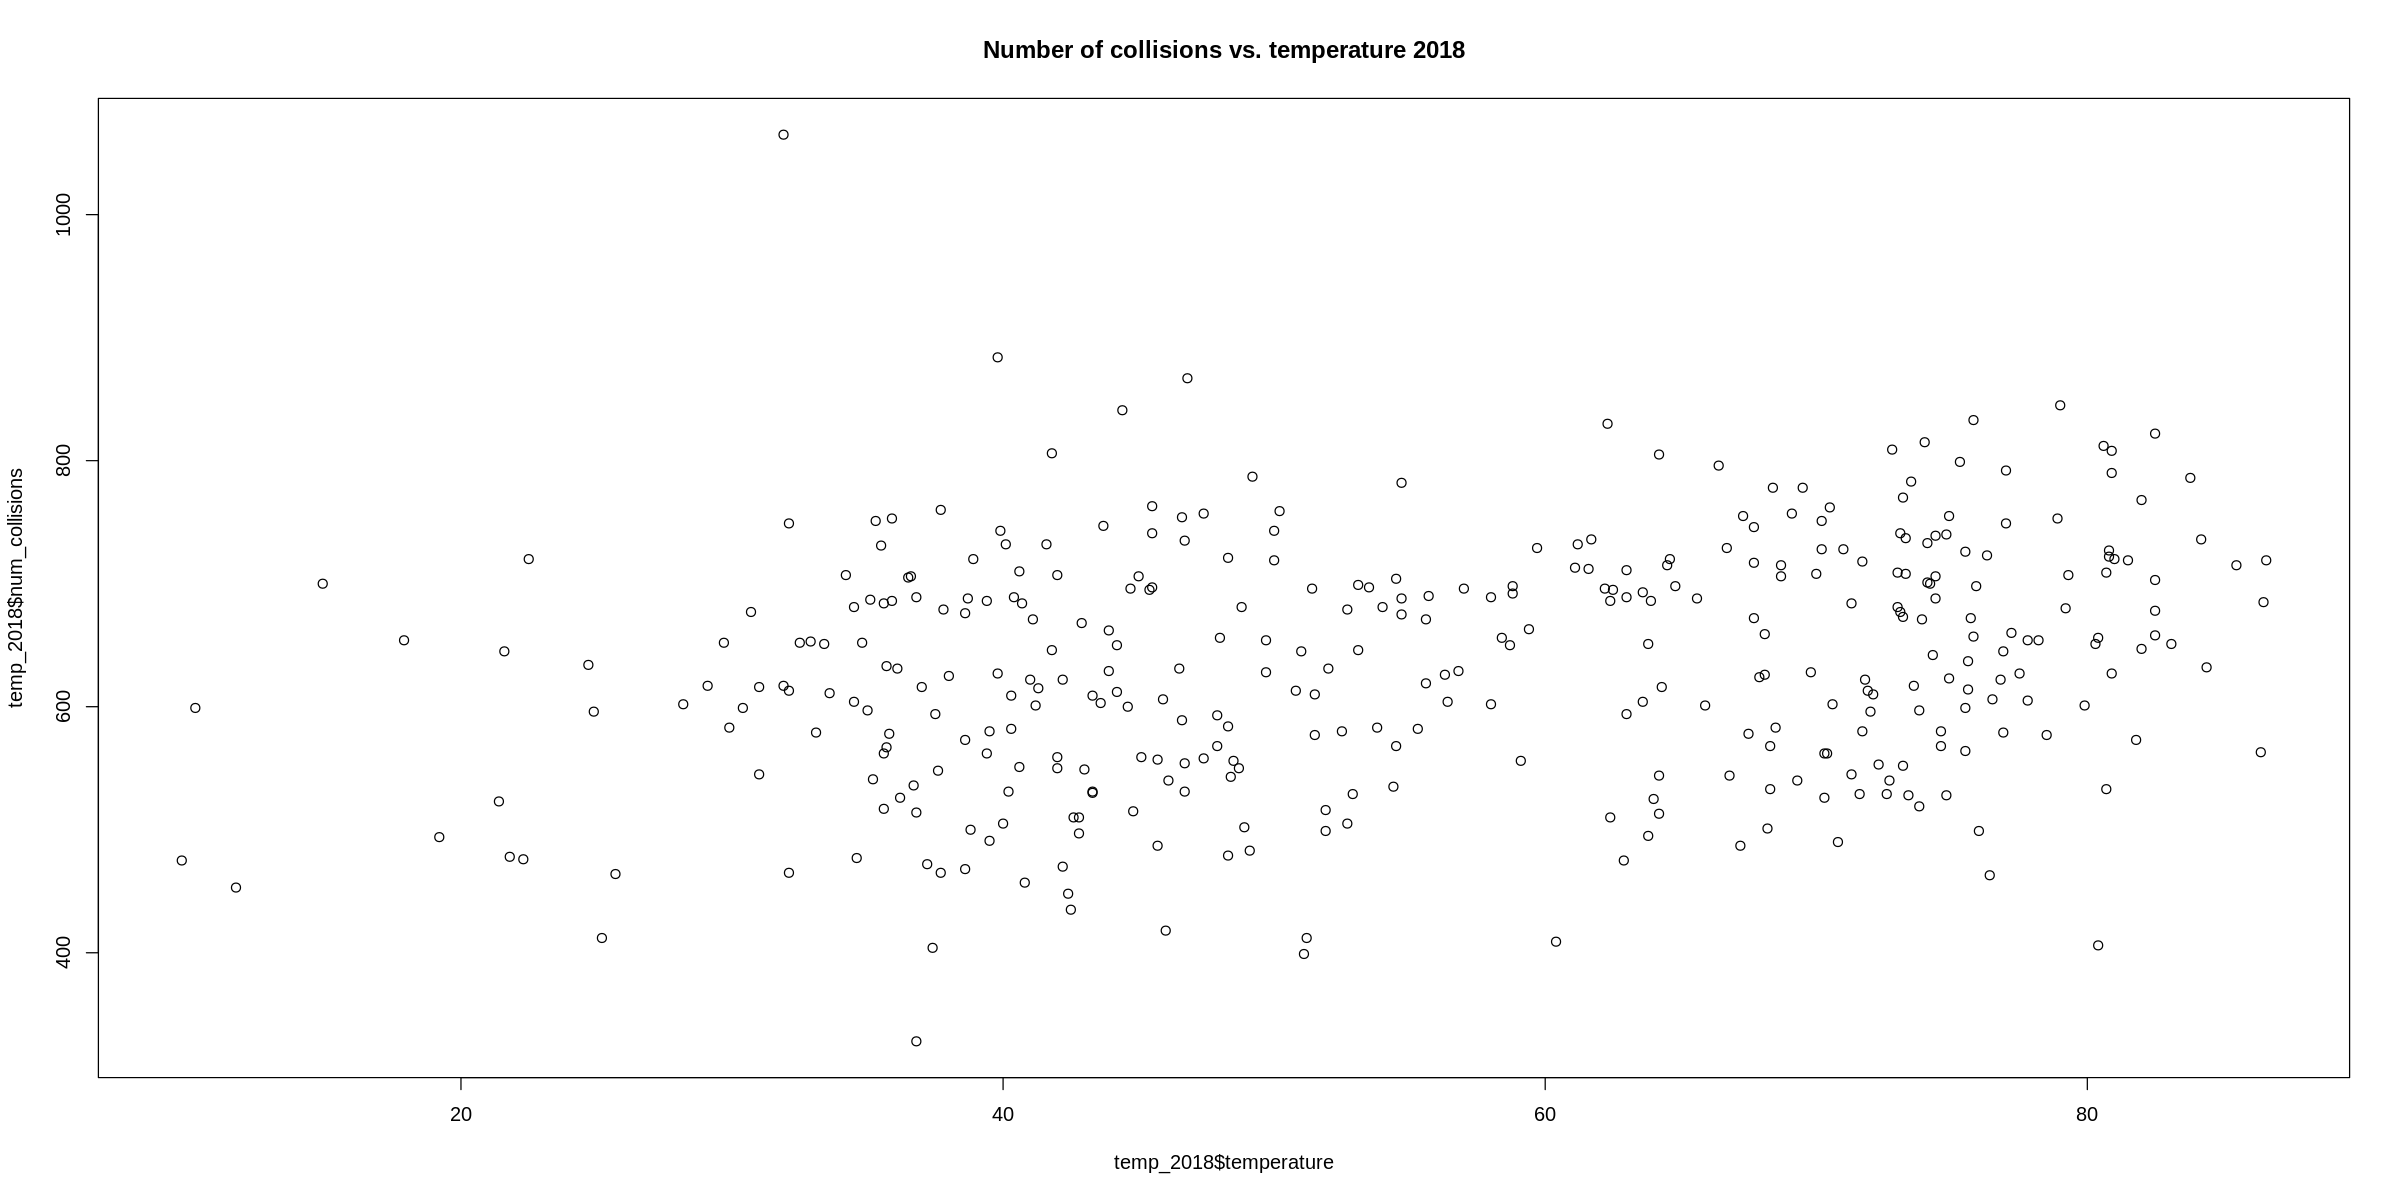

In [ ]:
plot(temp_2018$temperature, temp_2018$num_collisions, main="Number of collisions vs. temperature 2018")

In [ ]:
cor(temp_2018$temperature, temp_2018$num_collisions)

[1] 0.2524512